# Analytics Parlamentaqui(*Frontend*)

#### Period of analysis: 06-03-2021 to 18-05-2021

#### SUMMARY:

- This notebook represents an analysis of the frontent repository quality of the Parlamentaqui project in the period set out above.

### TEAM:

##### Semester: 2020/02
##### Professor: Hilmer Neri

##### Members:

- Felipe Campos
- Gabriel Albino	 
- Helena Bretas	 
- Lucas Machado	 
- Cibele Freitas	 
- Cristian Furtado	 
- Eduarda Rodrigues	 
- João Pedro Lyra	 
- Mariana Oliveira	 
- Rafael Fernandes	 

### LIBRARIES

In [1]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import seaborn as sn
import os

# Deal with API request
import urllib3
from urllib3 import request
from datetime import datetime, timedelta

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

### DATAFRAME SETTINGS

In [2]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### Repo Config

In [4]:
#insert the repo names and used lenguages

repos = ['frontend']
language = [['frontend', 'js']]

repos_lenguage = {}

for item in language:
    repos_lenguage[f"{item[0]}"] = item[1]
    

# Part 1: Code Quality

### Step: Extraction

All extraction of data related to code quality was taken from the SonarCloud URL, which returns the result of the last analysis. For each release carried out, an analysis was collected.

### Step: Data Processing

Importing all data JSONs extracted from each release by SonarCloud

In [5]:
jsons = glob('analytics-raw-data/*.json') # add the path here

Filtering jsons related to the frontend repository

In [6]:
jsons = [x for x in jsons if x.find('frontend') > 1]

In [7]:
jsons

['analytics-raw-data/fga-eps-mds-2020_2-frontend-04-05-2021(0).json',
 'analytics-raw-data/fga-eps-mds-2020_2-frontend-23-03-2021(0).json',
 'analytics-raw-data/fga-eps-mds-2020_2-frontend-09-05-2021(2).json',
 'analytics-raw-data/fga-eps-mds-2020_2-frontend-01-05-2021(0).json',
 'analytics-raw-data/fga-eps-mds-2020_2-frontend-02-05-2021(0).json',
 'analytics-raw-data/fga-eps-mds-2020_2-frontend-10-05-2021(1).json',
 'analytics-raw-data/fga-eps-mds-2020_2-frontend-09-05-2021(0).json',
 'analytics-raw-data/fga-eps-mds-2020_2-frontend-09-05-2021(1).json',
 'analytics-raw-data/fga-eps-mds-2020_2-frontend-10-05-2021(0).json',
 'analytics-raw-data/fga-eps-mds-2020_2-frontend-18-04-2021(0).json',
 'analytics-raw-data/fga-eps-mds-2020_2-frontend-19-05-2021(0).json']

Creating functions to read JSON files and add them to a DataFrame

In [8]:
# read the json files
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

# creates the base dataframe
def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

Resulting DataFrame 

In [9]:
base_component_df = create_base_component_df(jsons)

In [10]:
base_component_df

,metric,value,bestValue,filename,repository,version
27,duplicated_lines_density,0.0,True,fga-eps-mds-2020_2-frontend-01-05-2021(0).json,frontend,01-05-2021(0)
28,functions,88,NaN,fga-eps-mds-2020_2-frontend-01-05-2021(0).json,frontend,01-05-2021(0)
29,security_rating,1.0,True,fga-eps-mds-2020_2-frontend-01-05-2021(0).json,frontend,01-05-2021(0)
30,files,51,NaN,fga-eps-mds-2020_2-frontend-01-05-2021(0).json,frontend,01-05-2021(0)
31,complexity,120,NaN,fga-eps-mds-2020_2-frontend-01-05-2021(0).json,frontend,01-05-2021(0)
32,ncloc,2551,NaN,fga-eps-mds-2020_2-frontend-01-05-2021(0).json,frontend,01-05-2021(0)
33,coverage,0.0,False,fga-eps-mds-2020_2-frontend-01-05-2021(0).json,frontend,01-05-2021(0)
34,reliability_rating,3.0,False,fga-eps-mds-2020_2-frontend-01-05-2021(0).json,frontend,01-05-2021(0)
35,comment_lines_density,2.9,False,fga-eps-mds-2020_2-frontend-01-05-2021(0).json,frontend,01-05-2021(0)
36,duplicated_lines_density,0.0,True,fga-eps-mds-2020_2-frontend-02-05-2021(0).json,frontend,02-05-2021(0)


Converting the "version" fields of the DataFrame to type date, so that sorting can be performed.

In [11]:
base_component_df['version'] =  pd.to_datetime(base_component_df['version'], format='%d-%m-%Y(%H)')
base_component_df = base_component_df.sort_values(by=['version'], ascending=True)

Defining the list of metrics to be evaluated

In [12]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

Defining the functions to build a dataframe using the specific metrics of each analyzed file

In [13]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        file_component_data = metric_per_file(file_component)
        file_name = os.path.basename(i)
               
        file_repository = file_name.split("-", 5)[4]
        file_lenguage = repos_lenguage[f"{file_repository}"]
        
        file_component_df = generate_file_dataframe_per_release(metric_list, 
                                                                file_component_data,
                                                                language_extension = file_lenguage)
        file_component_df['filename'] = file_name

        df = df.append(file_component_df, ignore_index=True)
        
    # replace TeamName by yours.    
    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

Creating the DataFrame with the metrics extracted by file with each release

In [14]:
file_component_df = create_file_df(jsons)

Converting the "version" fields of the DataFrame to type date, so that sorting can be performed.

In [15]:
file_component_df['version'] =  pd.to_datetime(file_component_df['version'], format='%d-%m-%Y(%H)')
file_component_df = file_component_df.sort_values(by=['version'], ascending=True)

Exporting the DataFrame to an excel file

In [16]:
file_component_df.to_excel('data/frontend_data.xlsx', index = False)

In [17]:
file_component_df.head()

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
45,src/components/Tweet/Tweet.js,2,2,0.0,0.0,0.0,31,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-23-03-2021(0).json,frontend,2021-03-23
30,src/App.js,1,1,0.0,0.0,0.0,30,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-23-03-2021(0).json,frontend,2021-03-23
31,src/components/Breadcrumb/Breadcrumbs.js,5,7,0.0,0.0,0.0,36,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-23-03-2021(0).json,frontend,2021-03-23
32,src/components/DeputiesList/DeputiesList.js,2,2,0.0,0.0,0.0,24,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-23-03-2021(0).json,frontend,2021-03-23
33,src/screens/DeputiesScreen.js,1,1,0.0,0.0,0.0,10,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-frontend-23-03-2021(0).json,frontend,2021-03-23


In [18]:
repository_dataframes = {} 

for repository in repos:
    df = file_component_df[file_component_df['repository'] == f"{repository}"]
    df.name = f"{repository}"
    repository_dataframes[f"{repository}"] = df

### Step: Data Analysis

#### Metric calculations

##### COMPLEXITY

In [19]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [20]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [21]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

### Calculate m1, m2 and m3

Defining the function to create the DataFrame that contains the metrics calculated in each release

In [22]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    repository_list = []
    version_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'repository': repository_list, 
                               'version': version_list})
        
    return metrics_df

In [23]:
repository_metrics = {}

for repository, repo_df in repository_dataframes.items():   
    metrics_df = create_metrics_df(repo_df)
    metrics_df.name = f"{repository}"
    repository_metrics[f"{repository}"] = metrics_df

#### Frontend Metrics

In [24]:
repository_metrics['frontend']

,m1,m2,m3,repository,version
0,0.937500,0.125000,1.000000,frontend,2021-03-23 00:00:00
1,0.964286,0.107143,1.000000,frontend,2021-04-18 00:00:00
2,0.966667,0.066667,1.000000,frontend,2021-05-01 00:00:00
3,0.966667,0.066667,1.000000,frontend,2021-05-02 00:00:00
4,0.966667,0.100000,1.000000,frontend,2021-05-04 00:00:00
5,0.968750,0.093750,0.937500,frontend,2021-05-09 00:00:00
6,0.968750,0.093750,0.937500,frontend,2021-05-09 01:00:00
7,0.968750,0.093750,0.937500,frontend,2021-05-09 02:00:00
8,0.968750,0.062500,0.937500,frontend,2021-05-10 00:00:00
9,0.971429,0.057143,0.971429,frontend,2021-05-10 01:00:00


### Step: Data Vizualization

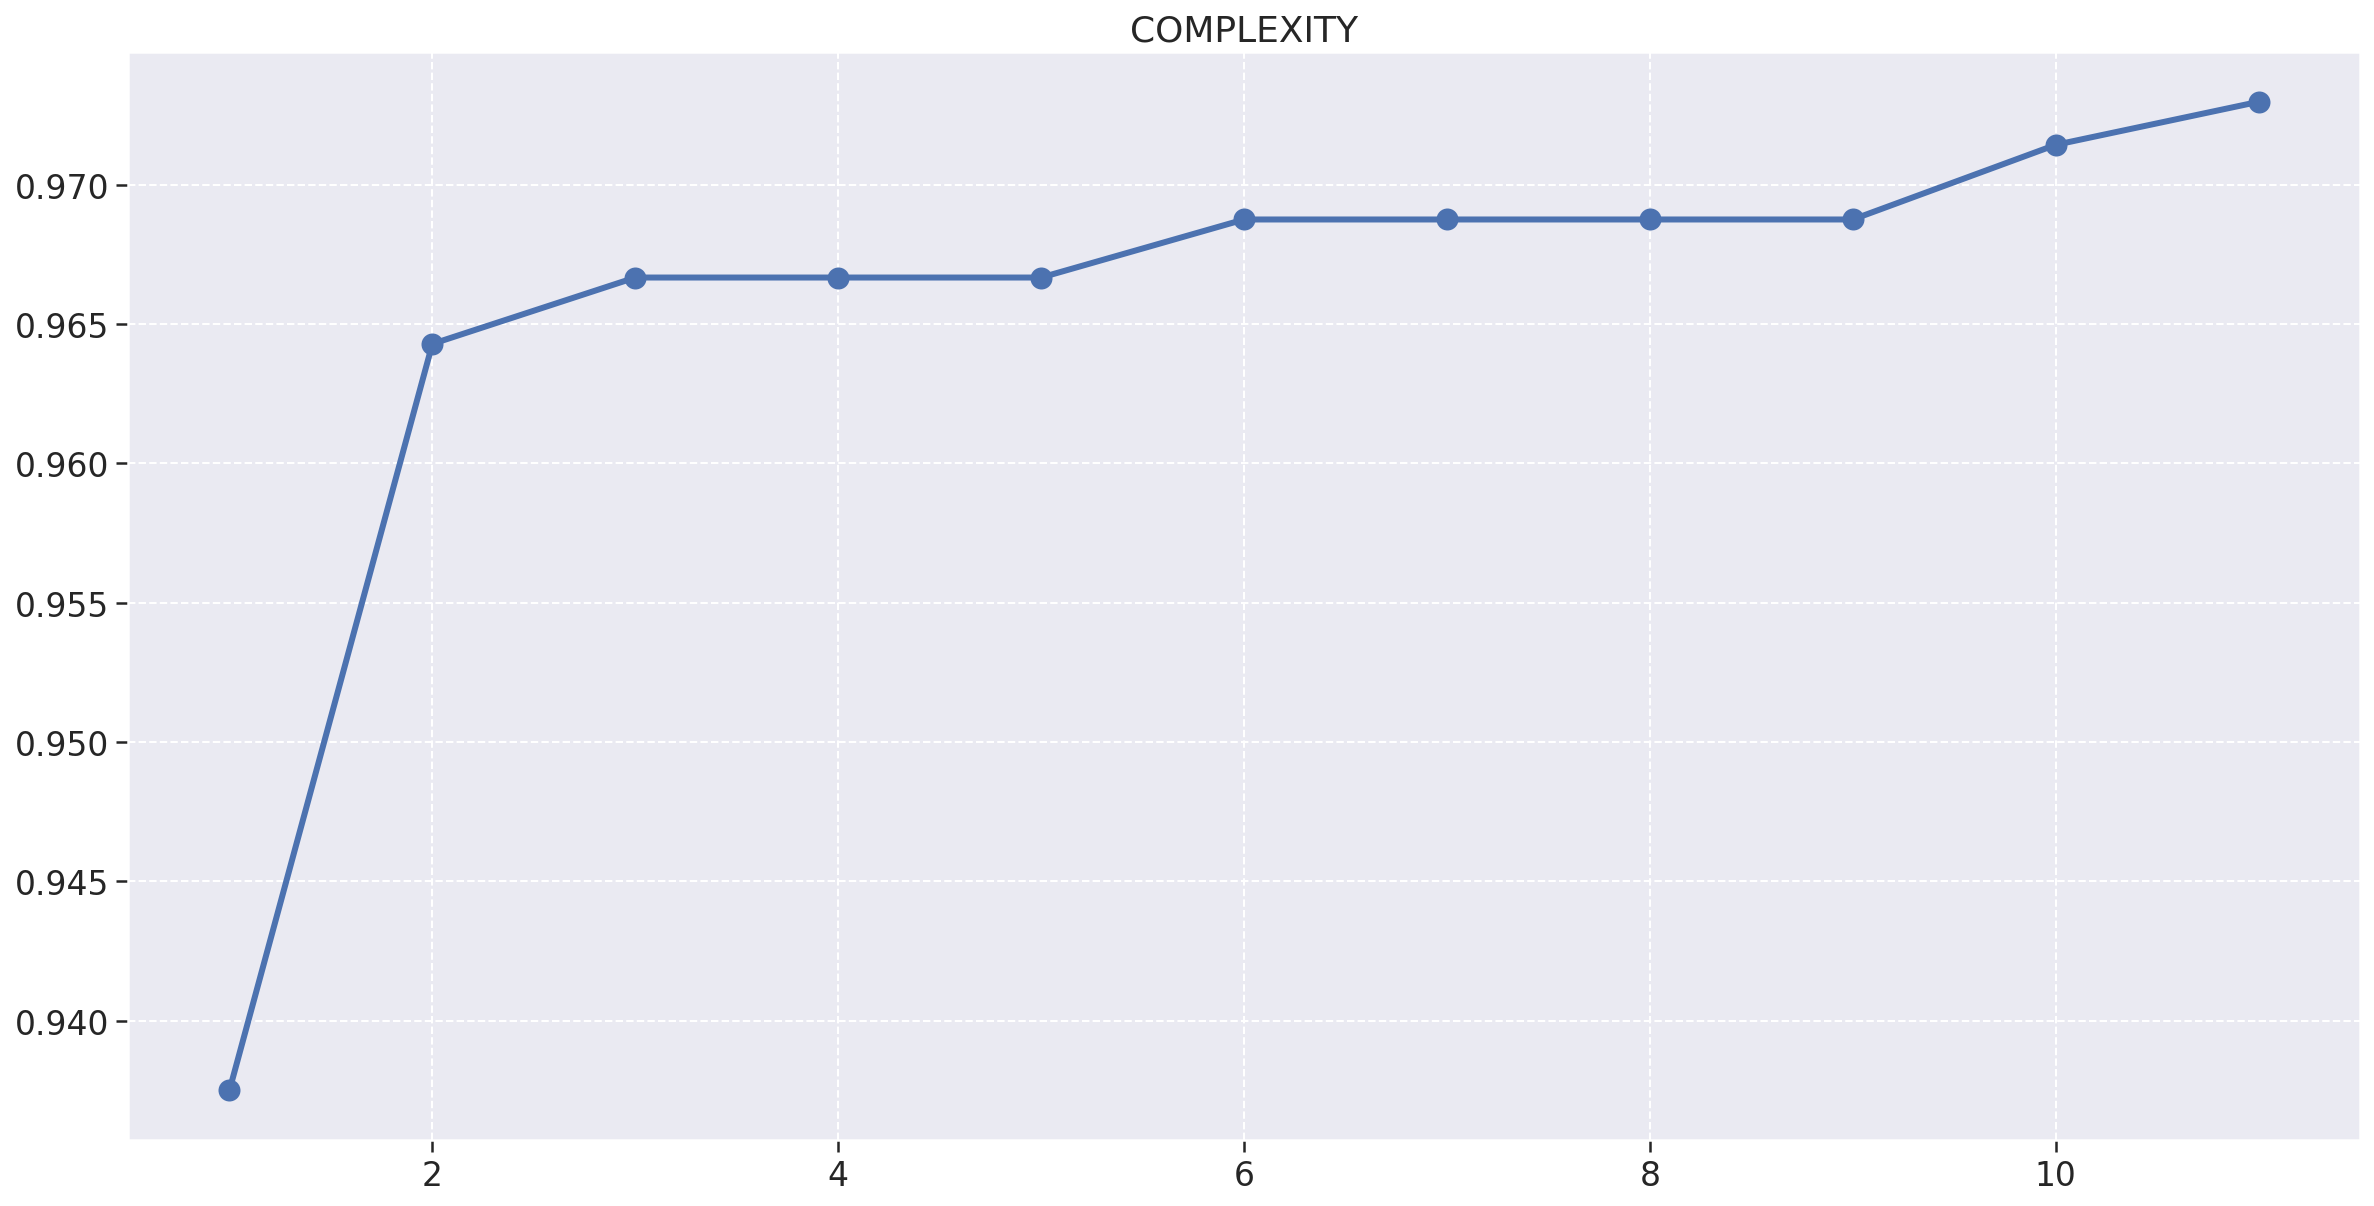

In [25]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"COMPLEXITY")
    plt.plot(range(1, 12),metrics_df['m1'],linewidth=3, marker='o', markersize=10)

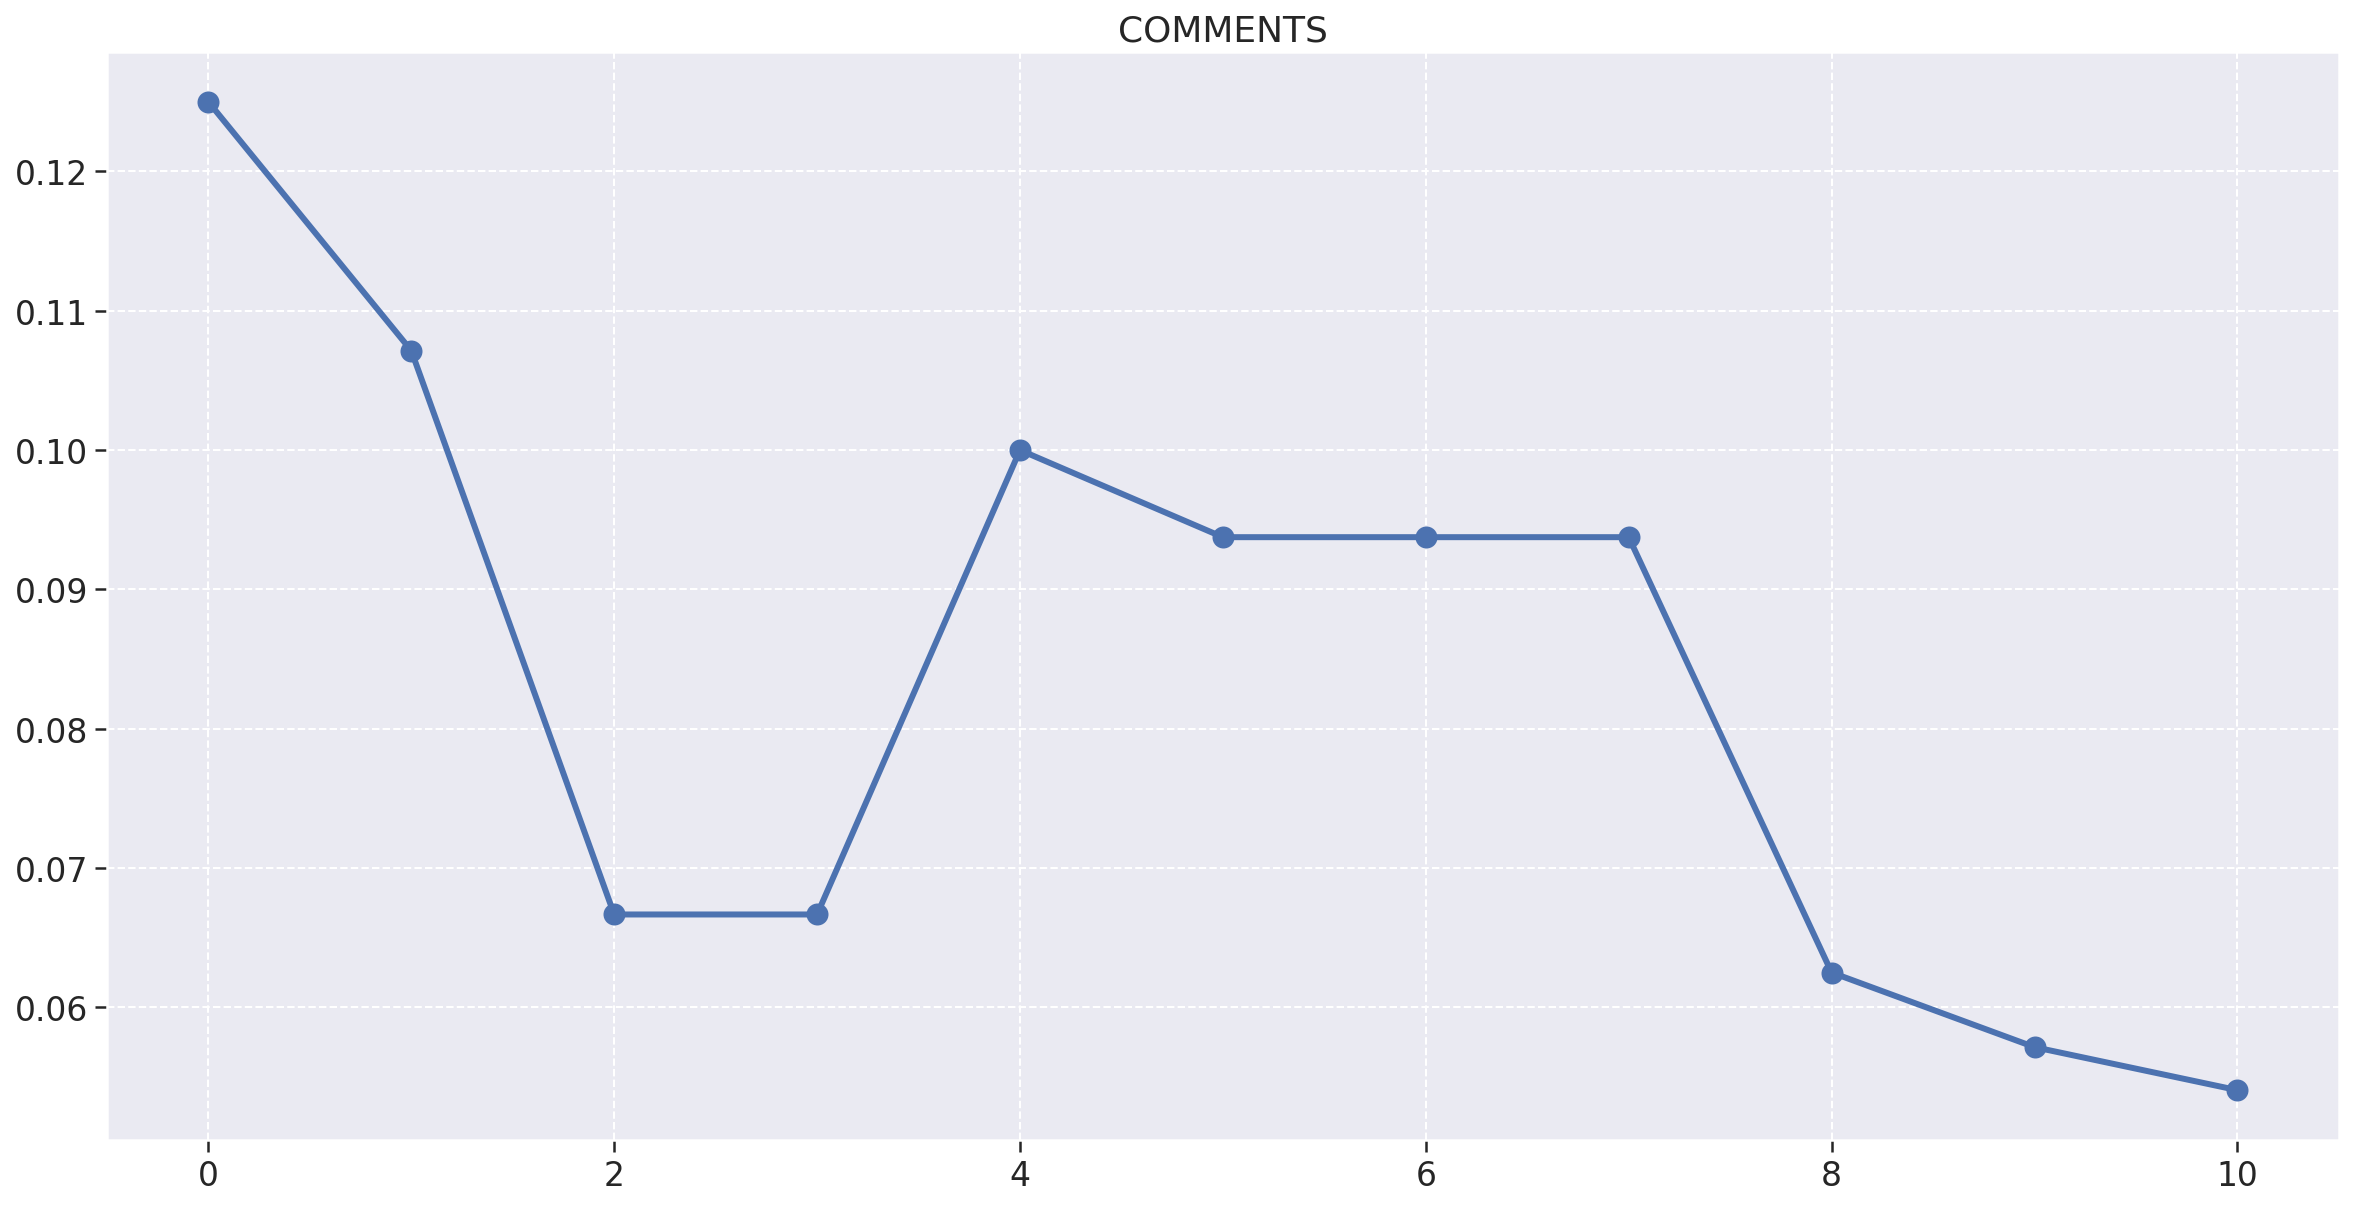

In [26]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"COMMENTS")
    plt.plot(metrics_df['m2'], linewidth=3, marker='o', markersize=10)

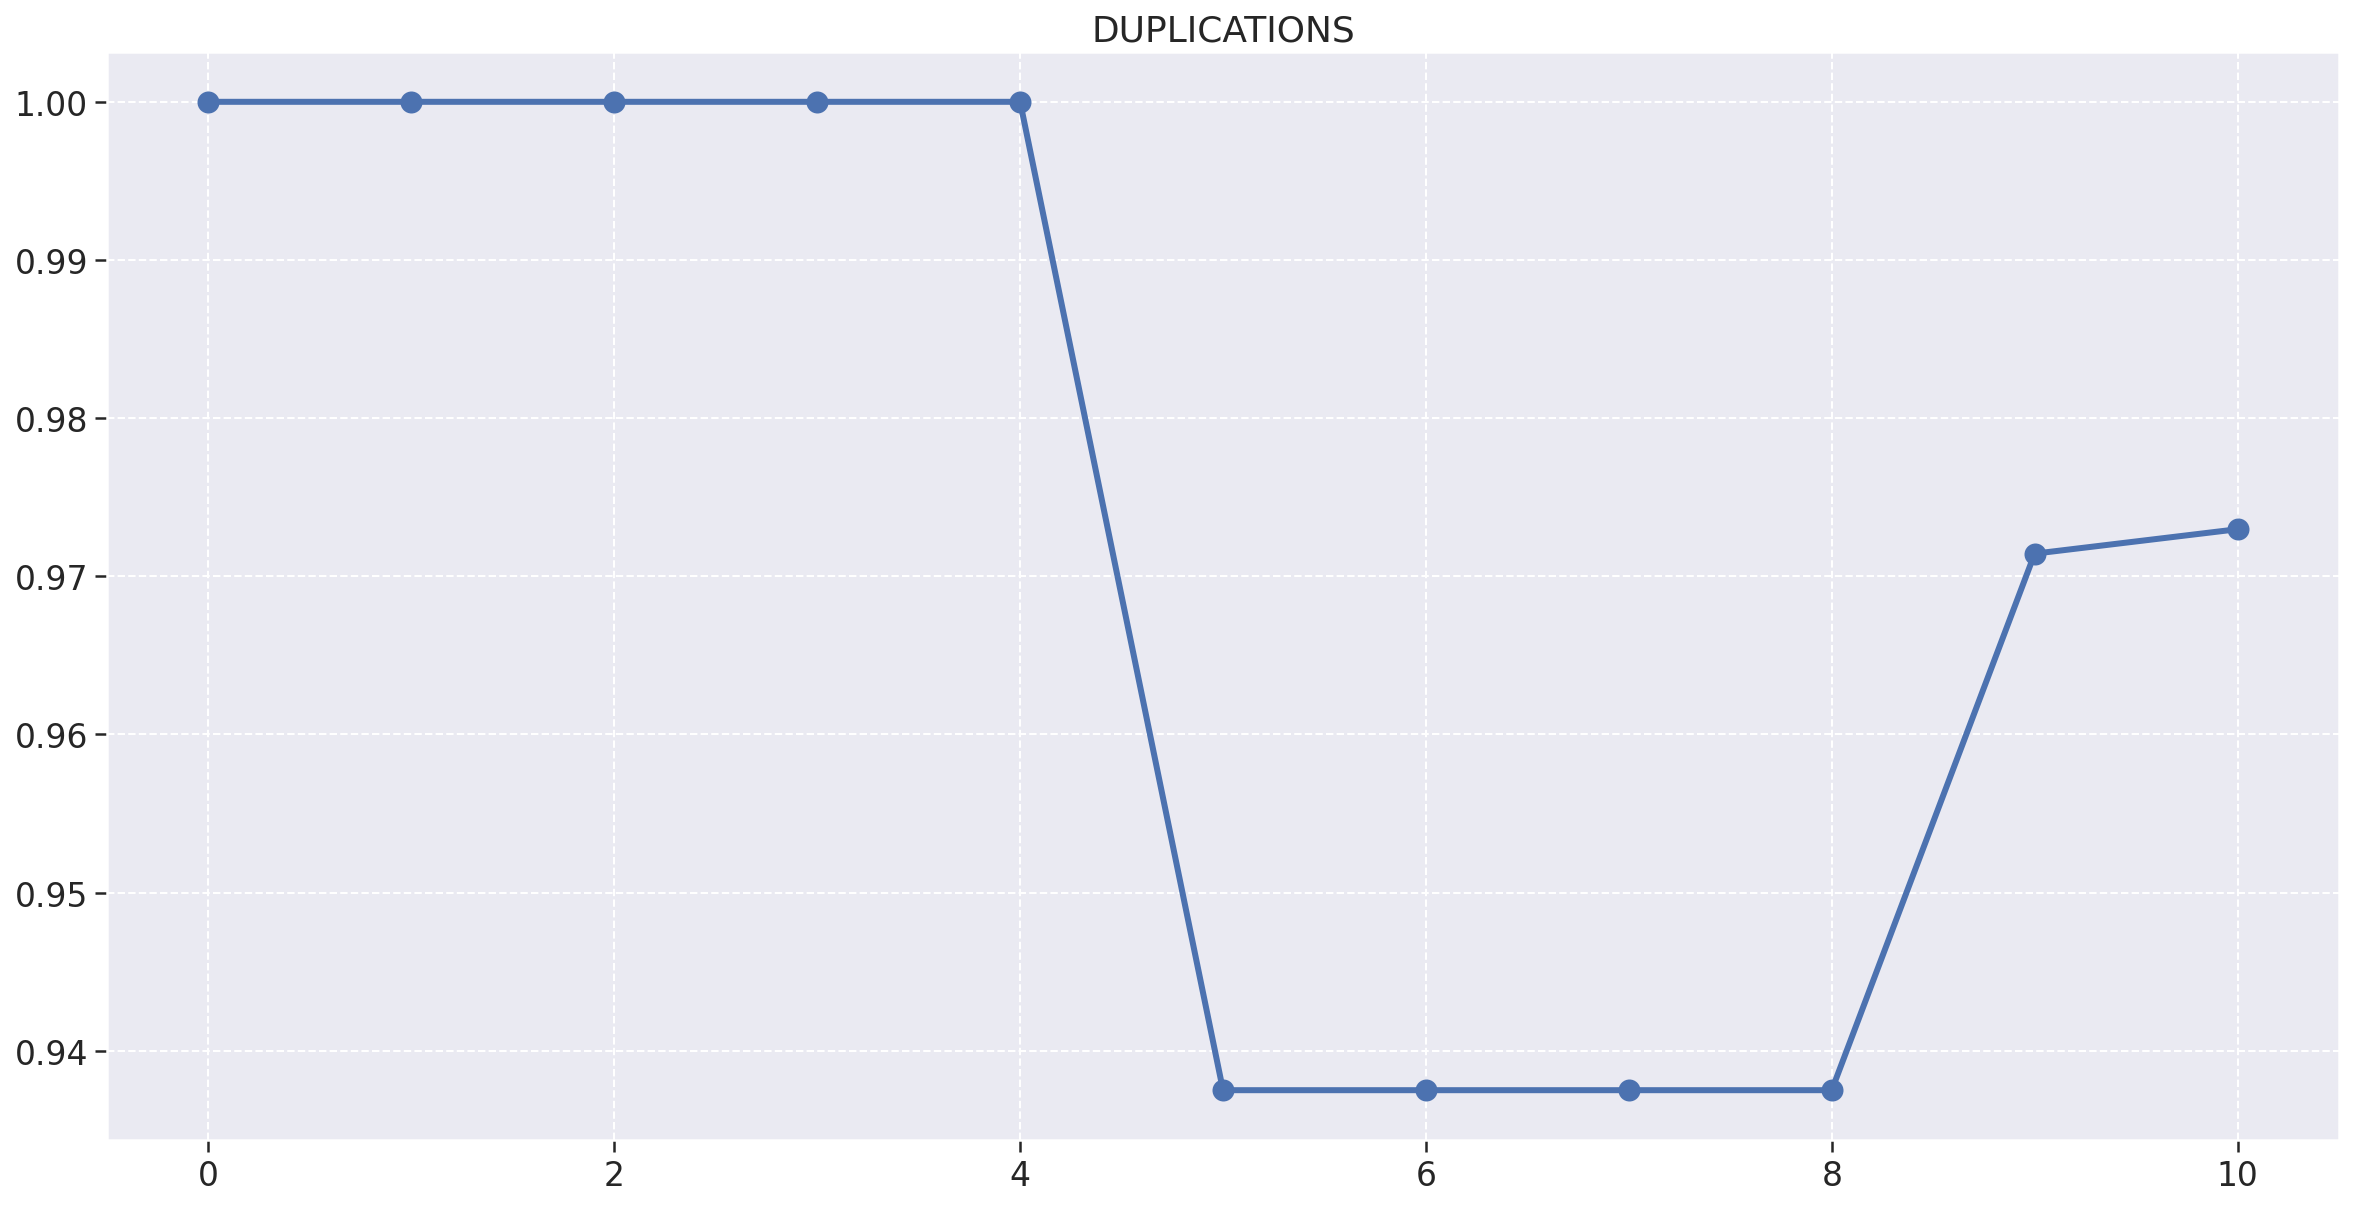

In [27]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"DUPLICATIONS")
    plt.plot(metrics_df['m3'], linewidth=3, marker='o', markersize=10)

In [28]:
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

for repository, metrics_df in repository_metrics.items(): 
    metrics_df['asc1'] = ((metrics_df['m1']*pm1)+(metrics_df['m2']*pm2)+(metrics_df['m3']*pm3))*psc1

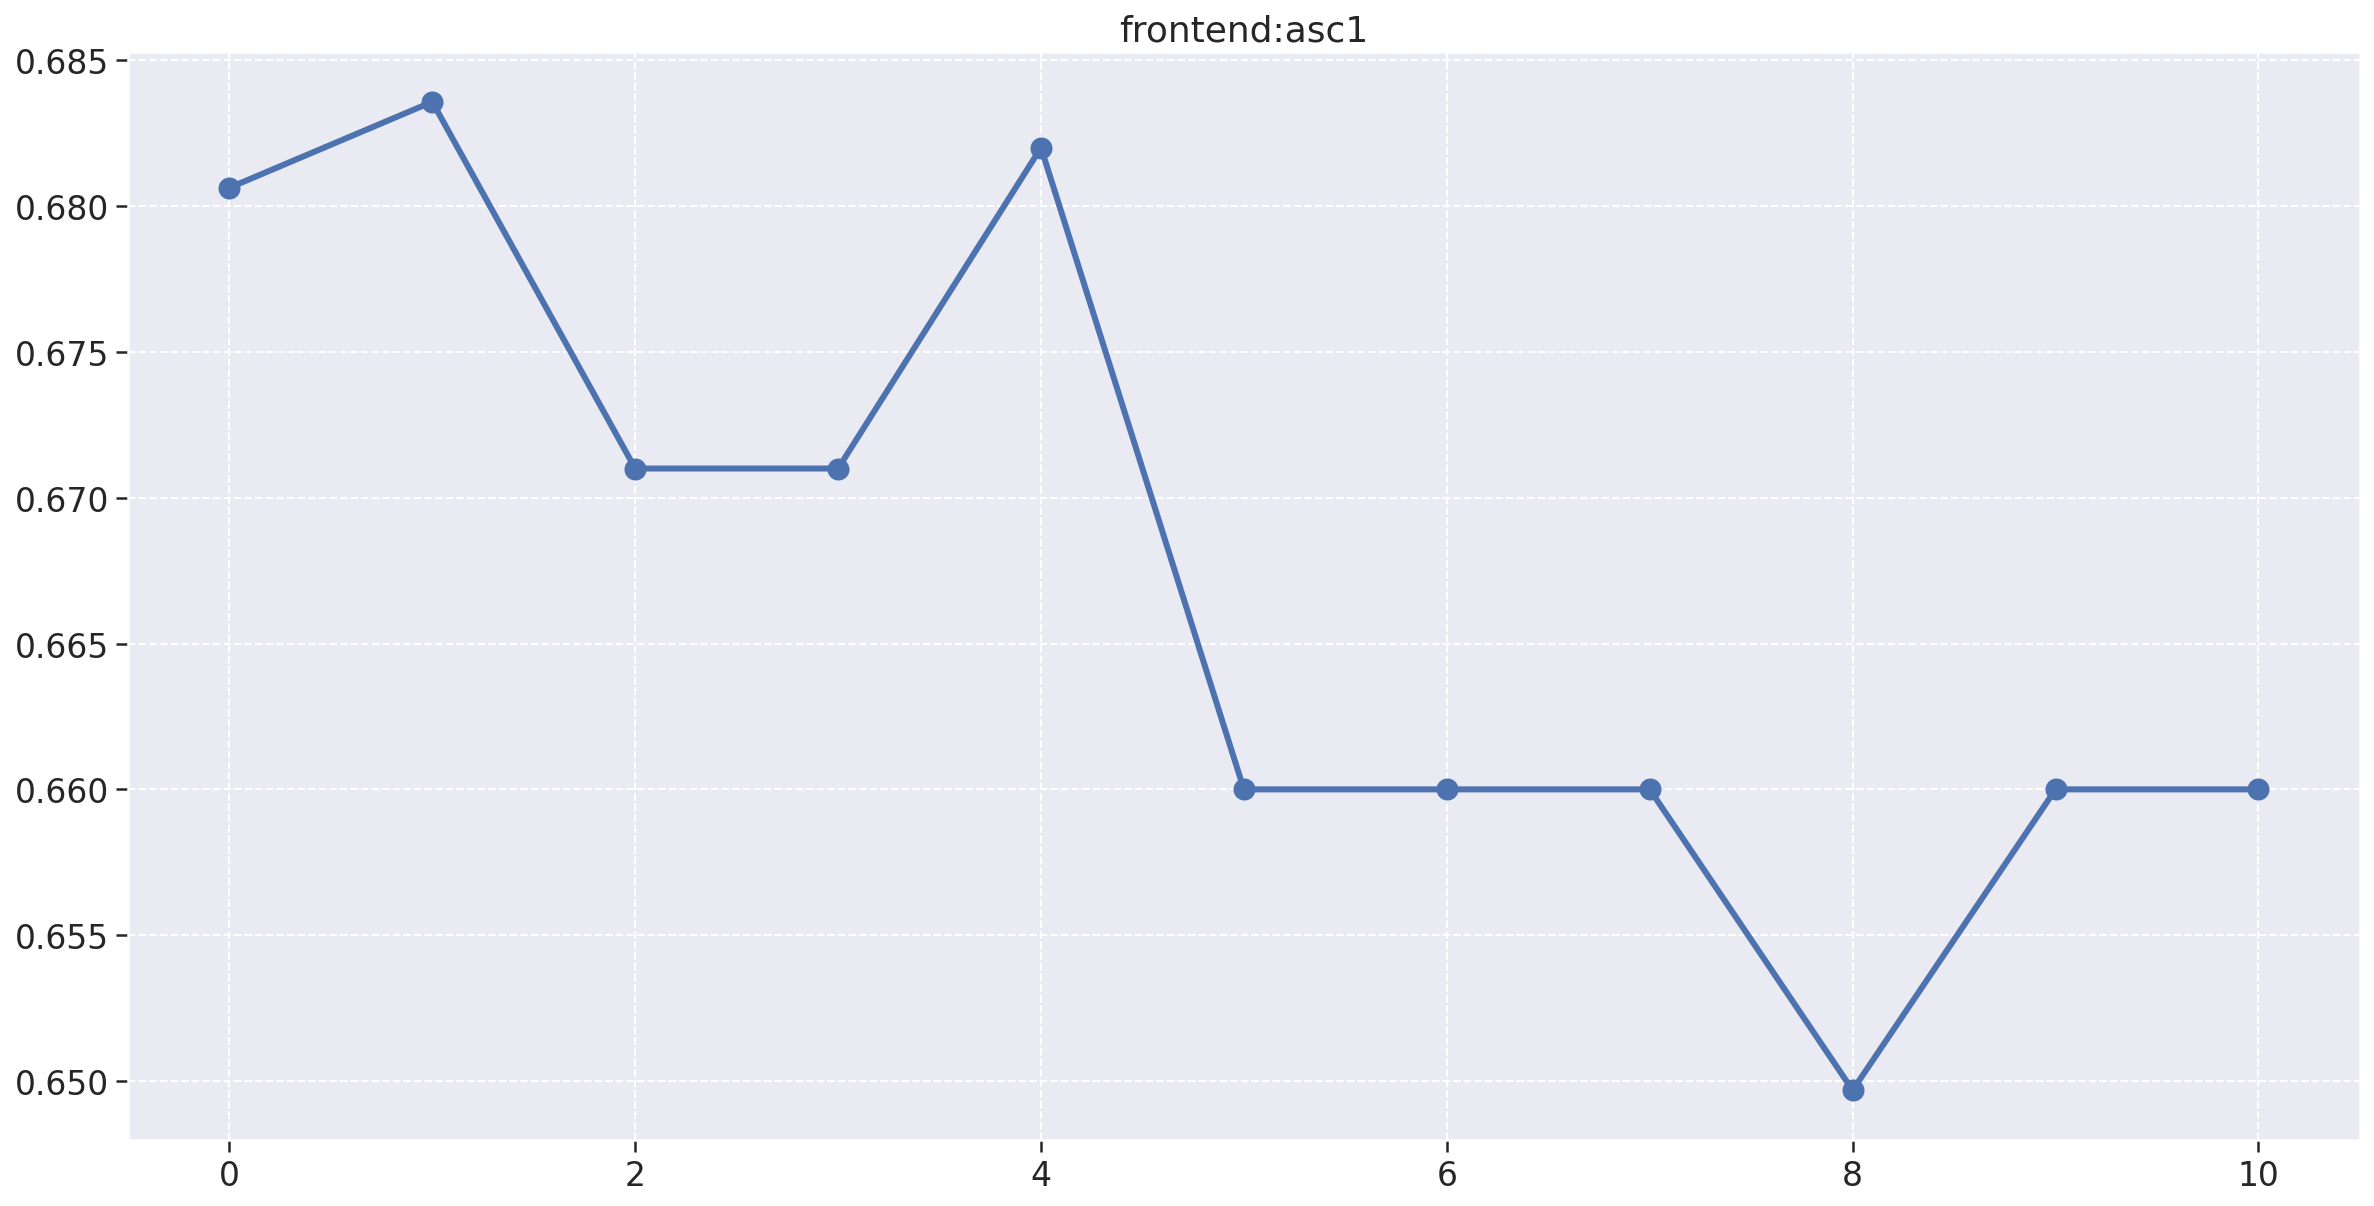

In [29]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:asc1")
    plt.plot(metrics_df['asc1'], linewidth=3, marker='o', markersize=10)

In [30]:
all_metrics_df = pd.DataFrame()

for repository, metrics_df in repository_metrics.items():
    all_metrics_df = pd.concat([all_metrics_df, metrics_df], ignore_index=True)

all_metrics_df['ac1'] = all_metrics_df['asc1'] * 1
all_metrics_df['total'] = all_metrics_df['asc1'] * 1

In [31]:
all_metrics_df

,m1,m2,m3,repository,version,asc1,ac1,total
0,0.937500,0.125000,1.000000,frontend,2021-03-23 00:00:00,0.680625,0.680625,0.680625
1,0.964286,0.107143,1.000000,frontend,2021-04-18 00:00:00,0.683571,0.683571,0.683571
2,0.966667,0.066667,1.000000,frontend,2021-05-01 00:00:00,0.671000,0.671000,0.671000
3,0.966667,0.066667,1.000000,frontend,2021-05-02 00:00:00,0.671000,0.671000,0.671000
4,0.966667,0.100000,1.000000,frontend,2021-05-04 00:00:00,0.682000,0.682000,0.682000
5,0.968750,0.093750,0.937500,frontend,2021-05-09 00:00:00,0.660000,0.660000,0.660000
6,0.968750,0.093750,0.937500,frontend,2021-05-09 01:00:00,0.660000,0.660000,0.660000
7,0.968750,0.093750,0.937500,frontend,2021-05-09 02:00:00,0.660000,0.660000,0.660000
8,0.968750,0.062500,0.937500,frontend,2021-05-10 00:00:00,0.649687,0.649687,0.649687
9,0.971429,0.057143,0.971429,frontend,2021-05-10 01:00:00,0.660000,0.660000,0.660000


#### Correlation Matrix

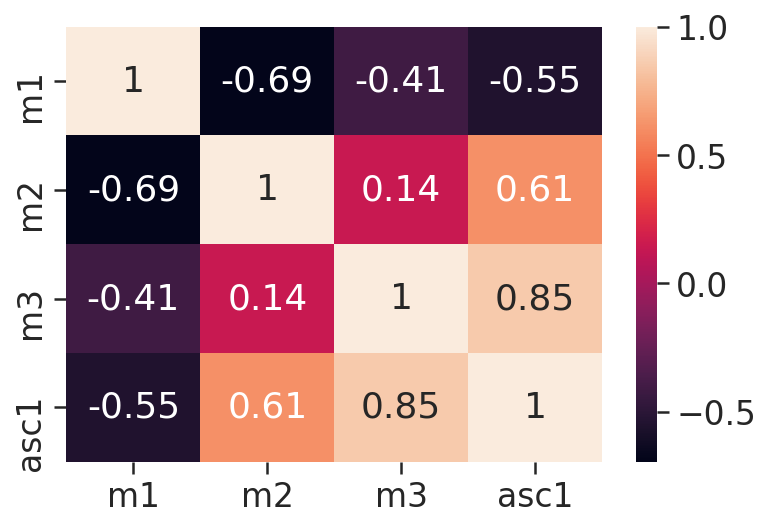

In [32]:
corrMatrix = all_metrics_df[["m1", "m2", "m3", "asc1"]].corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#### Descriptive statistics

In [33]:
columns = ["m1", "m2", "m3", "asc1"]
st = ["mean", "mode", "median", "variance", "std", "min", "max"]
data = []



for i in range(len(columns)):
    data.append([all_metrics_df[columns[i]].mean(),
    all_metrics_df[columns[i]].mode()[0],
    all_metrics_df[columns[i]].median(),
    all_metrics_df[columns[i]].var(),
    all_metrics_df[columns[i]].std(),
    all_metrics_df[columns[i]].min(),
    all_metrics_df[columns[i]].max()])
    
ds_df = pd.DataFrame(data, columns=st, index=columns)
ds_df

,mean,mode,median,variance,std,min,max
m1,0.965562,0.96875,0.968750,0.000092,0.009606,0.937500,0.972973
m2,0.083675,0.09375,0.093750,0.000544,0.023319,0.054054,0.125000
m3,0.972218,1.00000,0.972973,0.000868,0.029465,0.937500,1.000000
asc1,0.667080,0.66000,0.660000,0.000126,0.011233,0.649687,0.683571


##  PRODUCTIVITY

In [34]:
jsons = glob('productivity/*.json') # add the path here

In [35]:
jsons

['productivity/gateway_issues.json',
 'productivity/documentation_issues.json',
 'productivity/frontend_issues.json']

In [36]:
# read the json files
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

In [37]:
frontend = read_json(jsons[2])

In [65]:
df_frontend = pd.DataFrame(frontend)
df_frontend

,number,title,labels,state,created_at,closed_at
0,2,US45 | Lista de deputados da home,"[FEATURE, HARD, MDS]",closed,2021-03-06T16:14:46Z,2021-03-13T16:29:19Z
1,3,Informações do perfil do deputado.,"[FEATURE, HARD, MDS]",closed,2021-03-06T16:15:47Z,2021-04-10T02:18:18Z
2,4,Documentação: Identidade visual,[DOCS],closed,2021-03-06T16:24:03Z,2021-03-20T18:38:19Z
3,5,Migrar lean inception,[DOCS],closed,2021-03-06T16:27:49Z,2021-03-20T18:37:59Z
4,6,Documento de visão,"[DOCS, FEATURE]",closed,2021-03-06T16:35:14Z,2021-03-20T18:38:01Z
5,7,Navegação superior,"[FEATURE, MDS, MEDIUM]",closed,2021-03-06T20:46:33Z,2021-03-13T16:13:06Z
6,8,Caminho de navegação,"[FEATURE, HARD, MDS]",closed,2021-03-06T20:53:07Z,2021-03-13T16:27:07Z
7,15,Instanciar/Criar componentes da tela de result...,"[EASY, FEATURE, MDS, US]",closed,2021-03-13T16:41:50Z,2021-03-20T18:38:17Z
8,16,Criar componente de ultimos tweets da página i...,"[EASY, FEATURE, MDS, US]",closed,2021-03-13T16:47:38Z,2021-03-20T18:38:06Z
9,17,Fazer breadcrumb ser conectado com o router,"[HARD, HOTFIX, MDS]",closed,2021-03-13T16:56:07Z,2021-03-20T18:38:20Z


In [66]:
df_frontend["repository"] = "frontend"

In [67]:
df_frontend["created_at"] = pd.to_datetime(df_frontend["created_at"])
df_frontend["closed_at"] = pd.to_datetime(df_frontend["closed_at"])

In [68]:
df_frontend["time_open"] = df_frontend["closed_at"] - df_frontend["created_at"]

In [69]:
df_frontend

,number,title,labels,state,created_at,closed_at,repository,time_open
0,2,US45 | Lista de deputados da home,"[FEATURE, HARD, MDS]",closed,2021-03-06 16:14:46+00:00,2021-03-13 16:29:19+00:00,frontend,7 days 00:14:33
1,3,Informações do perfil do deputado.,"[FEATURE, HARD, MDS]",closed,2021-03-06 16:15:47+00:00,2021-04-10 02:18:18+00:00,frontend,34 days 10:02:31
2,4,Documentação: Identidade visual,[DOCS],closed,2021-03-06 16:24:03+00:00,2021-03-20 18:38:19+00:00,frontend,14 days 02:14:16
3,5,Migrar lean inception,[DOCS],closed,2021-03-06 16:27:49+00:00,2021-03-20 18:37:59+00:00,frontend,14 days 02:10:10
4,6,Documento de visão,"[DOCS, FEATURE]",closed,2021-03-06 16:35:14+00:00,2021-03-20 18:38:01+00:00,frontend,14 days 02:02:47
5,7,Navegação superior,"[FEATURE, MDS, MEDIUM]",closed,2021-03-06 20:46:33+00:00,2021-03-13 16:13:06+00:00,frontend,6 days 19:26:33
6,8,Caminho de navegação,"[FEATURE, HARD, MDS]",closed,2021-03-06 20:53:07+00:00,2021-03-13 16:27:07+00:00,frontend,6 days 19:34:00
7,15,Instanciar/Criar componentes da tela de result...,"[EASY, FEATURE, MDS, US]",closed,2021-03-13 16:41:50+00:00,2021-03-20 18:38:17+00:00,frontend,7 days 01:56:27
8,16,Criar componente de ultimos tweets da página i...,"[EASY, FEATURE, MDS, US]",closed,2021-03-13 16:47:38+00:00,2021-03-20 18:38:06+00:00,frontend,7 days 01:50:28
9,17,Fazer breadcrumb ser conectado com o router,"[HARD, HOTFIX, MDS]",closed,2021-03-13 16:56:07+00:00,2021-03-20 18:38:20+00:00,frontend,7 days 01:42:13


In [70]:
sprint_times = [["1", pd.to_datetime("2021-03-06T00:00:00Z")],
                ["2", pd.to_datetime("2021-03-13T00:00:00Z")],
                ["3", pd.to_datetime("2021-03-20T00:00:00Z")],
                ["4", pd.to_datetime("2021-03-27T00:00:00Z")],
                ["5", pd.to_datetime("2021-04-03T00:00:00Z")],
                ["6", pd.to_datetime("2021-04-10T00:00:00Z")],
                ["7", pd.to_datetime("2021-04-17T00:00:00Z")],
                ["8", pd.to_datetime("2021-04-24T00:00:00Z")],
                ["9", pd.to_datetime("2021-05-01T00:00:00Z")],
                ["10", pd.to_datetime("2021-05-08T00:00:00Z")],
                ["11", pd.to_datetime("2021-05-15T00:00:00Z")],]

for sprint in sprint_times:
    sprint.append(sprint[1] + timedelta(days=6) + timedelta(hours=23) + timedelta(minutes=59) + timedelta(seconds=59))

In [44]:
def sprint_start(date):
    for sprint in sprint_times:
        if date > sprint[1] and date < sprint[2]:
            return sprint[0]
        
def close_sprint(date):
    for sprint in sprint_times:
            if date > sprint[1] and date < sprint[2] + timedelta(days=1):
                return sprint[0]

In [71]:
df_frontend["started_on_sprint"] = df_frontend["created_at"].apply(sprint_start)
df_frontend["closed_on_sprint"] = df_frontend["closed_at"].apply(close_sprint)

In [72]:
df_frontend

,number,title,labels,state,created_at,closed_at,repository,time_open,started_on_sprint,closed_on_sprint
0,2,US45 | Lista de deputados da home,"[FEATURE, HARD, MDS]",closed,2021-03-06 16:14:46+00:00,2021-03-13 16:29:19+00:00,frontend,7 days 00:14:33,1,1
1,3,Informações do perfil do deputado.,"[FEATURE, HARD, MDS]",closed,2021-03-06 16:15:47+00:00,2021-04-10 02:18:18+00:00,frontend,34 days 10:02:31,1,5
2,4,Documentação: Identidade visual,[DOCS],closed,2021-03-06 16:24:03+00:00,2021-03-20 18:38:19+00:00,frontend,14 days 02:14:16,1,2
3,5,Migrar lean inception,[DOCS],closed,2021-03-06 16:27:49+00:00,2021-03-20 18:37:59+00:00,frontend,14 days 02:10:10,1,2
4,6,Documento de visão,"[DOCS, FEATURE]",closed,2021-03-06 16:35:14+00:00,2021-03-20 18:38:01+00:00,frontend,14 days 02:02:47,1,2
5,7,Navegação superior,"[FEATURE, MDS, MEDIUM]",closed,2021-03-06 20:46:33+00:00,2021-03-13 16:13:06+00:00,frontend,6 days 19:26:33,1,1
6,8,Caminho de navegação,"[FEATURE, HARD, MDS]",closed,2021-03-06 20:53:07+00:00,2021-03-13 16:27:07+00:00,frontend,6 days 19:34:00,1,1
7,15,Instanciar/Criar componentes da tela de result...,"[EASY, FEATURE, MDS, US]",closed,2021-03-13 16:41:50+00:00,2021-03-20 18:38:17+00:00,frontend,7 days 01:56:27,2,2
8,16,Criar componente de ultimos tweets da página i...,"[EASY, FEATURE, MDS, US]",closed,2021-03-13 16:47:38+00:00,2021-03-20 18:38:06+00:00,frontend,7 days 01:50:28,2,2
9,17,Fazer breadcrumb ser conectado com o router,"[HARD, HOTFIX, MDS]",closed,2021-03-13 16:56:07+00:00,2021-03-20 18:38:20+00:00,frontend,7 days 01:42:13,2,2


In [47]:
def count_labels(df):
    df = df.reset_index()
    tags = {
        "HOTFIX": 0,
        "DOCS": 0,
        "FEATURE": 0,
        "ARQ": 0,
        "DEVOPS": 0,
        "ANALYTICS": 0,
        "US": 0,
        "EASY": 0,
        "MEDIUM": 0,
        "HARD": 0,
        "EPS": 0,
        "MDS": 0
    }
    
    for line in range(len(df)):
        for label in df.loc[line]["labels"]:
            tags[label] = tags[label] + 1
            
    return tags

#### RESOLVED ISSUES' THROUGHPUT

In [48]:
def m7(number_of_issues_resolved, number_of_issues):
    
    resolved_issues_throughput = round((number_of_issues_resolved / number_of_issues) * 100, 2)
    
    return resolved_issues_throughput

#### ISSUE TYPE IN A TIMEFRAME

In [49]:
def density(issue, number_of_issues):
    issue_density = round((issue / number_of_issues) * 100, 2)
    return issue_density

def m8(tag_dict, number_of_issues):
    
    issue_densities = {
        "hotfix": [density(tag_dict["HOTFIX"], number_of_issues)],
        "docs": [density(tag_dict["DOCS"], number_of_issues)],
        "feature": [density(tag_dict["FEATURE"], number_of_issues)],
        "arq": [density(tag_dict["ARQ"], number_of_issues)],
        "devops": [density(tag_dict["DEVOPS"], number_of_issues)],
        "analytics": [density(tag_dict["ANALYTICS"], number_of_issues)],
        "us": [density(tag_dict["US"], number_of_issues)],
        "easy": [density(tag_dict["EASY"], number_of_issues)],
        "medium": [density(tag_dict["MEDIUM"], number_of_issues)],
        "hard": [density(tag_dict["HARD"], number_of_issues)],
        "eps": [density(tag_dict["EPS"], number_of_issues)],
        "mds": [density(tag_dict["MDS"], number_of_issues)]
    }

    issue_densities = pd.DataFrame.from_dict(issue_densities).T.reset_index()
    
    issue_densities.columns = ['density' ,'percentage']
    
    return issue_densities

#### BUGS RATIO

In [50]:
def m9(tag_dict, number_of_issues):
    
    bugs_ratio = round(((tag_dict["DOCS"] + tag_dict["FEATURE"] + tag_dict["ARQ"] + tag_dict["DEVOPS"] + tag_dict["ANALYTICS"]) / number_of_issues) * 100, 2)
    
    return bugs_ratio

In [51]:
sprint_dataframes = {}

for i in df_frontend.started_on_sprint.unique(): 
    df = df_frontend[df_frontend["started_on_sprint"] == f"{i}"]
    if i == 8:
        df = df[0:0]
    TAGS = count_labels(df)
    NUMBER_OF_ISSUES_RESOLVED = len(df[(df["started_on_sprint"] == f"{i}") & (df["closed_on_sprint"] == f"{i}")])
    NUMBER_OF_ISSUES = len(df)
    df = df_frontend[df_frontend["started_on_sprint"] == f"{i}"]
    sprint_dataframes[f"{i}"] = { "df": df,
                                  "TAGS":TAGS,
                                  "NUMBER_OF_ISSUES_RESOLVED": NUMBER_OF_ISSUES_RESOLVED,
                                  "NUMBER_OF_ISSUES": NUMBER_OF_ISSUES, 
                                  "m7": m7(NUMBER_OF_ISSUES_RESOLVED, NUMBER_OF_ISSUES),
                                  "m8": m8(TAGS, NUMBER_OF_ISSUES),
                                  "m9": m9(TAGS, NUMBER_OF_ISSUES),
                                  "no_sprint": i,
                                  "data_inicio": sprint_times[int(i)-1][1],
                                  "data_fim": sprint_times[int(i)-1][2],
                                }


In [52]:
productivity_metrics_df = pd.DataFrame(columns=["data_inicio", "data_fim", "m7", "m9", "no_sprint"])

In [53]:
for sprint in sprint_dataframes:
    productivity_metrics_df = productivity_metrics_df.append(dict(zip(productivity_metrics_df.columns,[ 
              sprint_dataframes[f"{sprint}"]["data_inicio"],
              sprint_dataframes[f"{sprint}"]["data_fim"], 
              sprint_dataframes[f"{sprint}"]["m7"], 
              sprint_dataframes[f"{sprint}"]["m9"], 
              sprint_dataframes[f"{sprint}"]["no_sprint"]
            ])), ignore_index=True)

In [54]:
productivity_metrics_df

,data_inicio,data_fim,m7,m9,no_sprint
0,2021-03-06 00:00:00+00:00,2021-03-12 23:59:59+00:00,42.86,114.29,1
1,2021-03-13 00:00:00+00:00,2021-03-19 23:59:59+00:00,100.00,66.67,2
2,2021-03-20 00:00:00+00:00,2021-03-26 23:59:59+00:00,0.00,92.86,3
3,2021-03-27 00:00:00+00:00,2021-04-02 23:59:59+00:00,0.00,100.00,4
4,2021-04-03 00:00:00+00:00,2021-04-09 23:59:59+00:00,0.00,0.00,5
5,2021-04-10 00:00:00+00:00,2021-04-16 23:59:59+00:00,20.00,60.00,6
6,2021-04-17 00:00:00+00:00,2021-04-23 23:59:59+00:00,22.22,44.44,7
7,2021-05-01 00:00:00+00:00,2021-05-07 23:59:59+00:00,0.00,80.00,9
8,2021-05-08 00:00:00+00:00,2021-05-14 23:59:59+00:00,0.00,100.00,10
9,2021-05-15 00:00:00+00:00,2021-05-21 23:59:59+00:00,20.00,100.00,11


### Data Vizualization

#### m7 - RESOLVED ISSUES' THROUGHPUT

<BarContainer object of 10 artists>

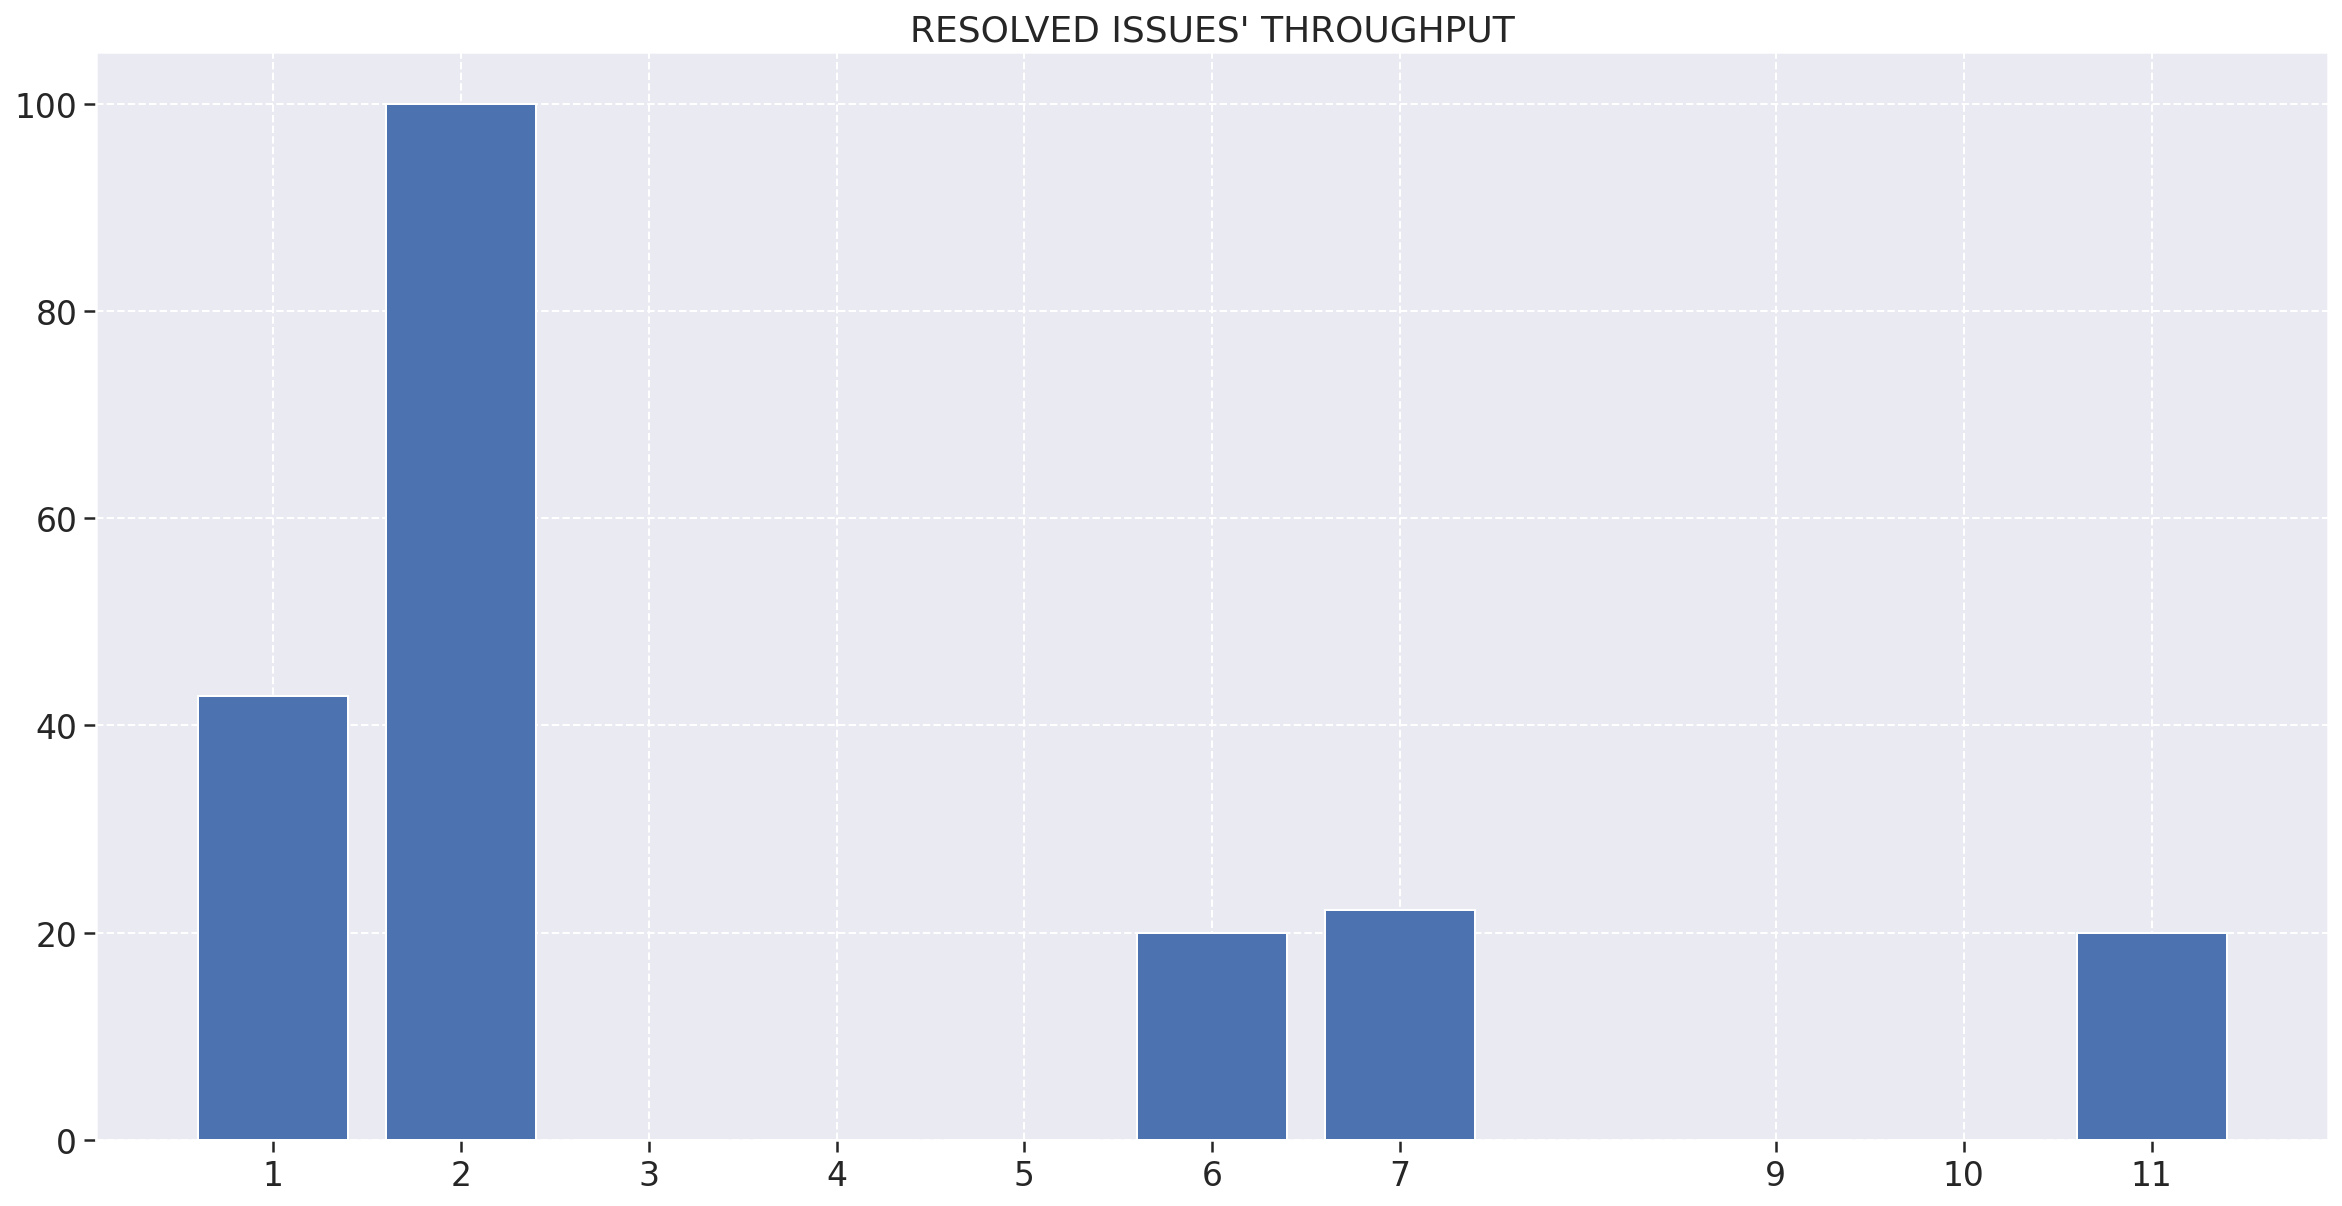

In [55]:
fig = plt.figure(figsize=(20, 10))
plt.title(f"RESOLVED ISSUES' THROUGHPUT")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 9, 10, 11])
plt.bar([1, 2, 3, 4, 5, 6, 7, 9, 10, 11],productivity_metrics_df['m7'])

<BarContainer object of 11 artists>

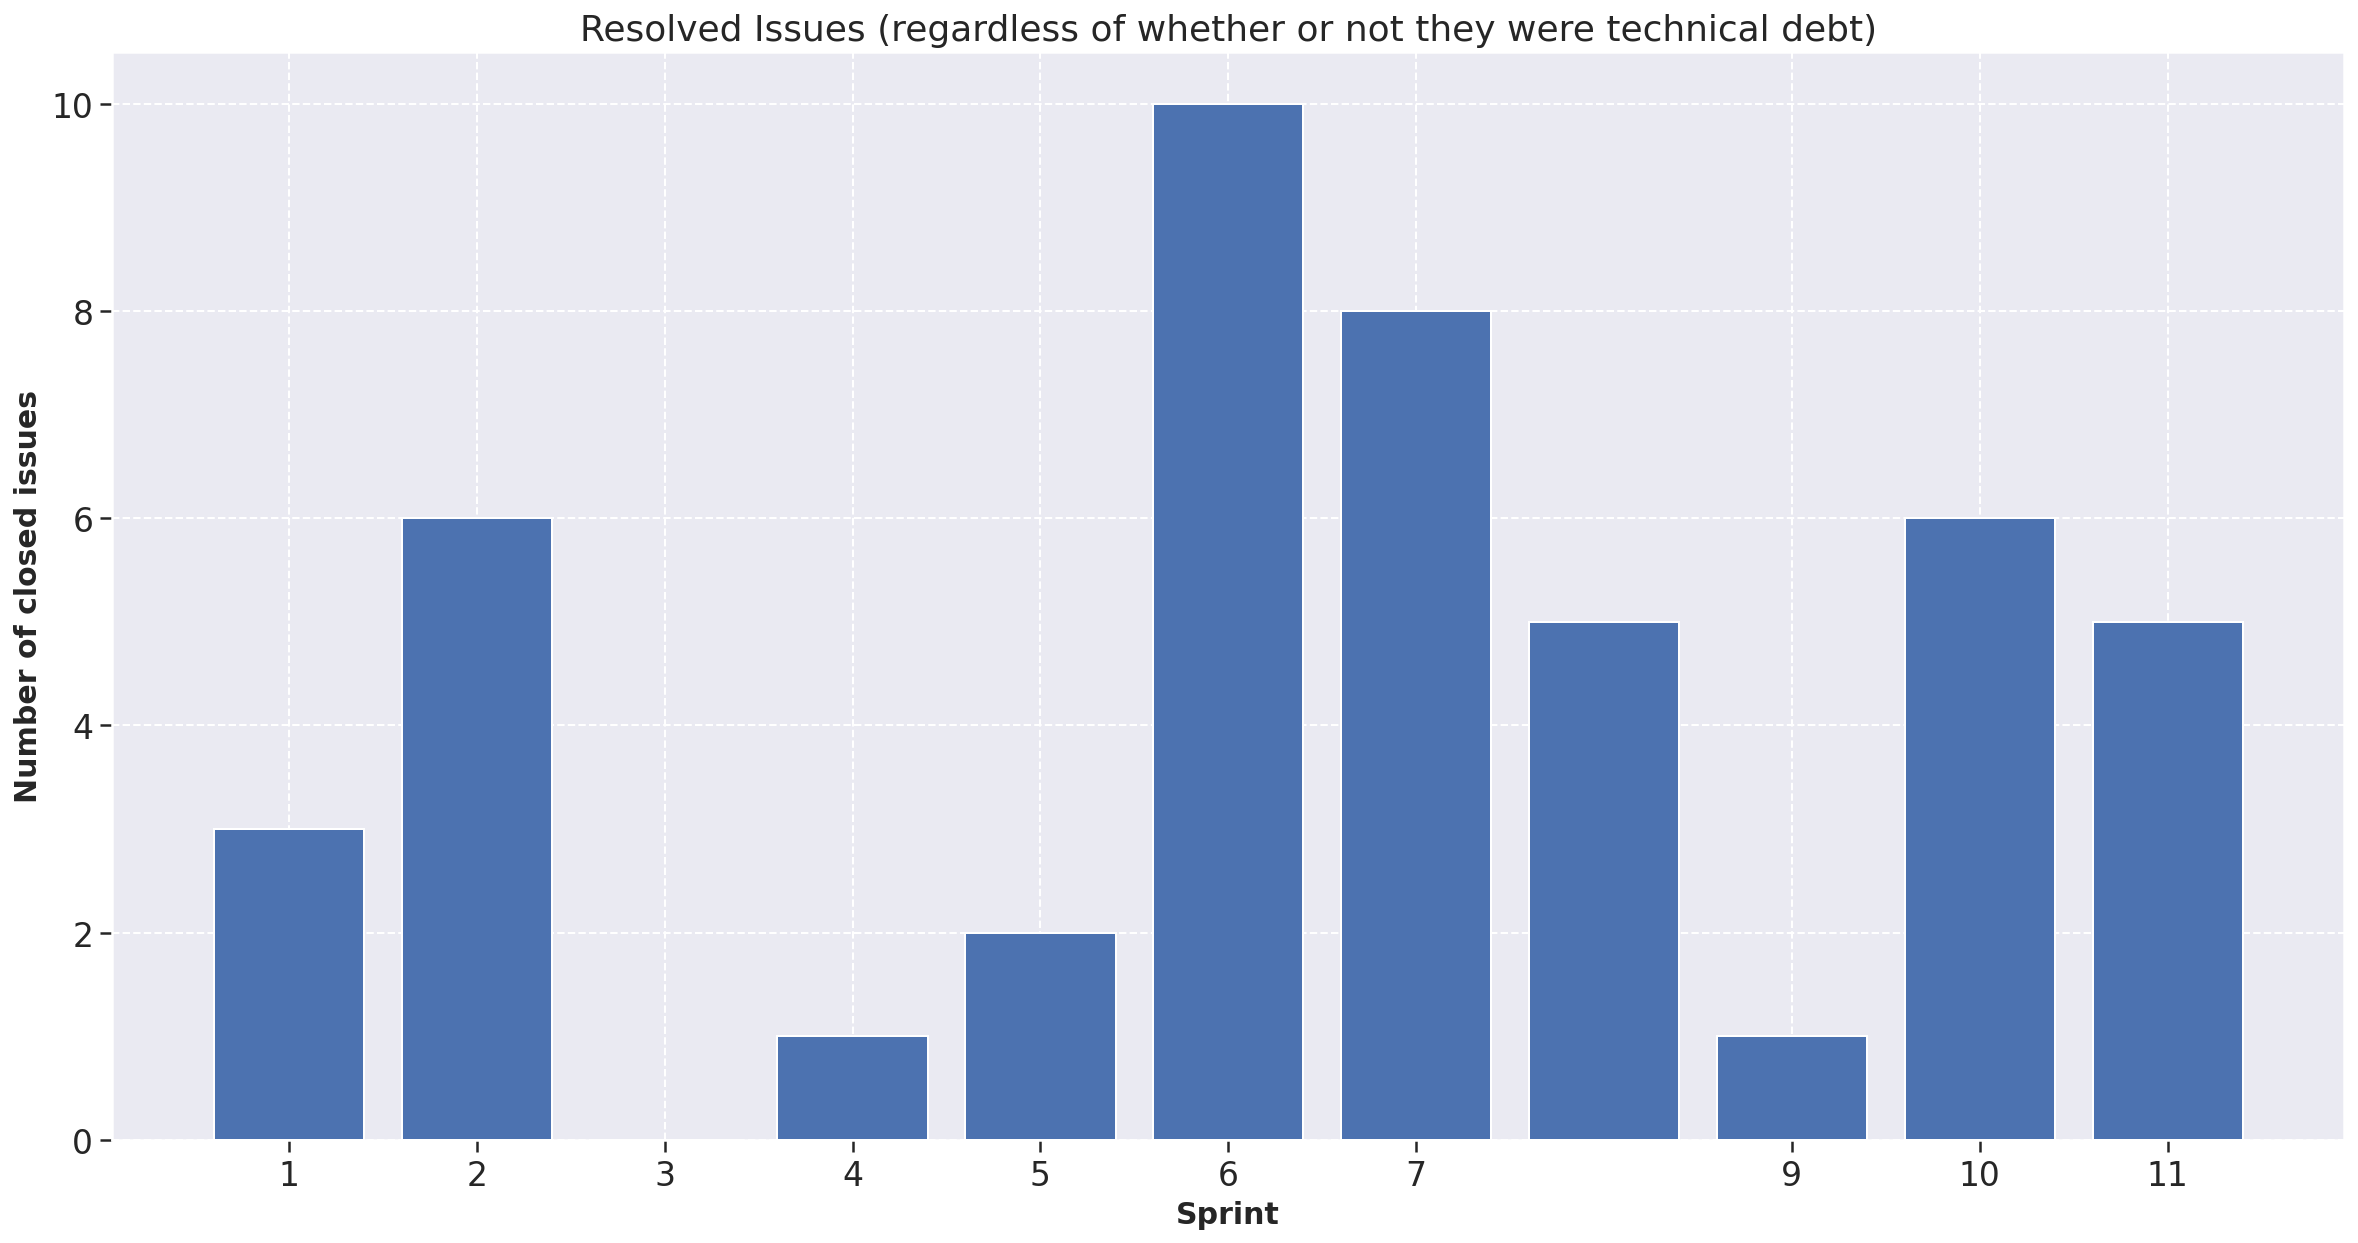

In [56]:
closed = []
sprints = range(1, 12)
for sprint in sprints:
    closed.append(len(df_frontend[(df_frontend["closed_on_sprint"] == f"{sprint}")]))

fig = plt.figure(figsize=(20, 10))
plt.title(f"Resolved Issues (regardless of whether or not they were technical debt)")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 9, 10, 11])
plt.xlabel('Sprint', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of closed issues', fontweight ='bold', fontsize = 15)
plt.bar(sprints,closed) 

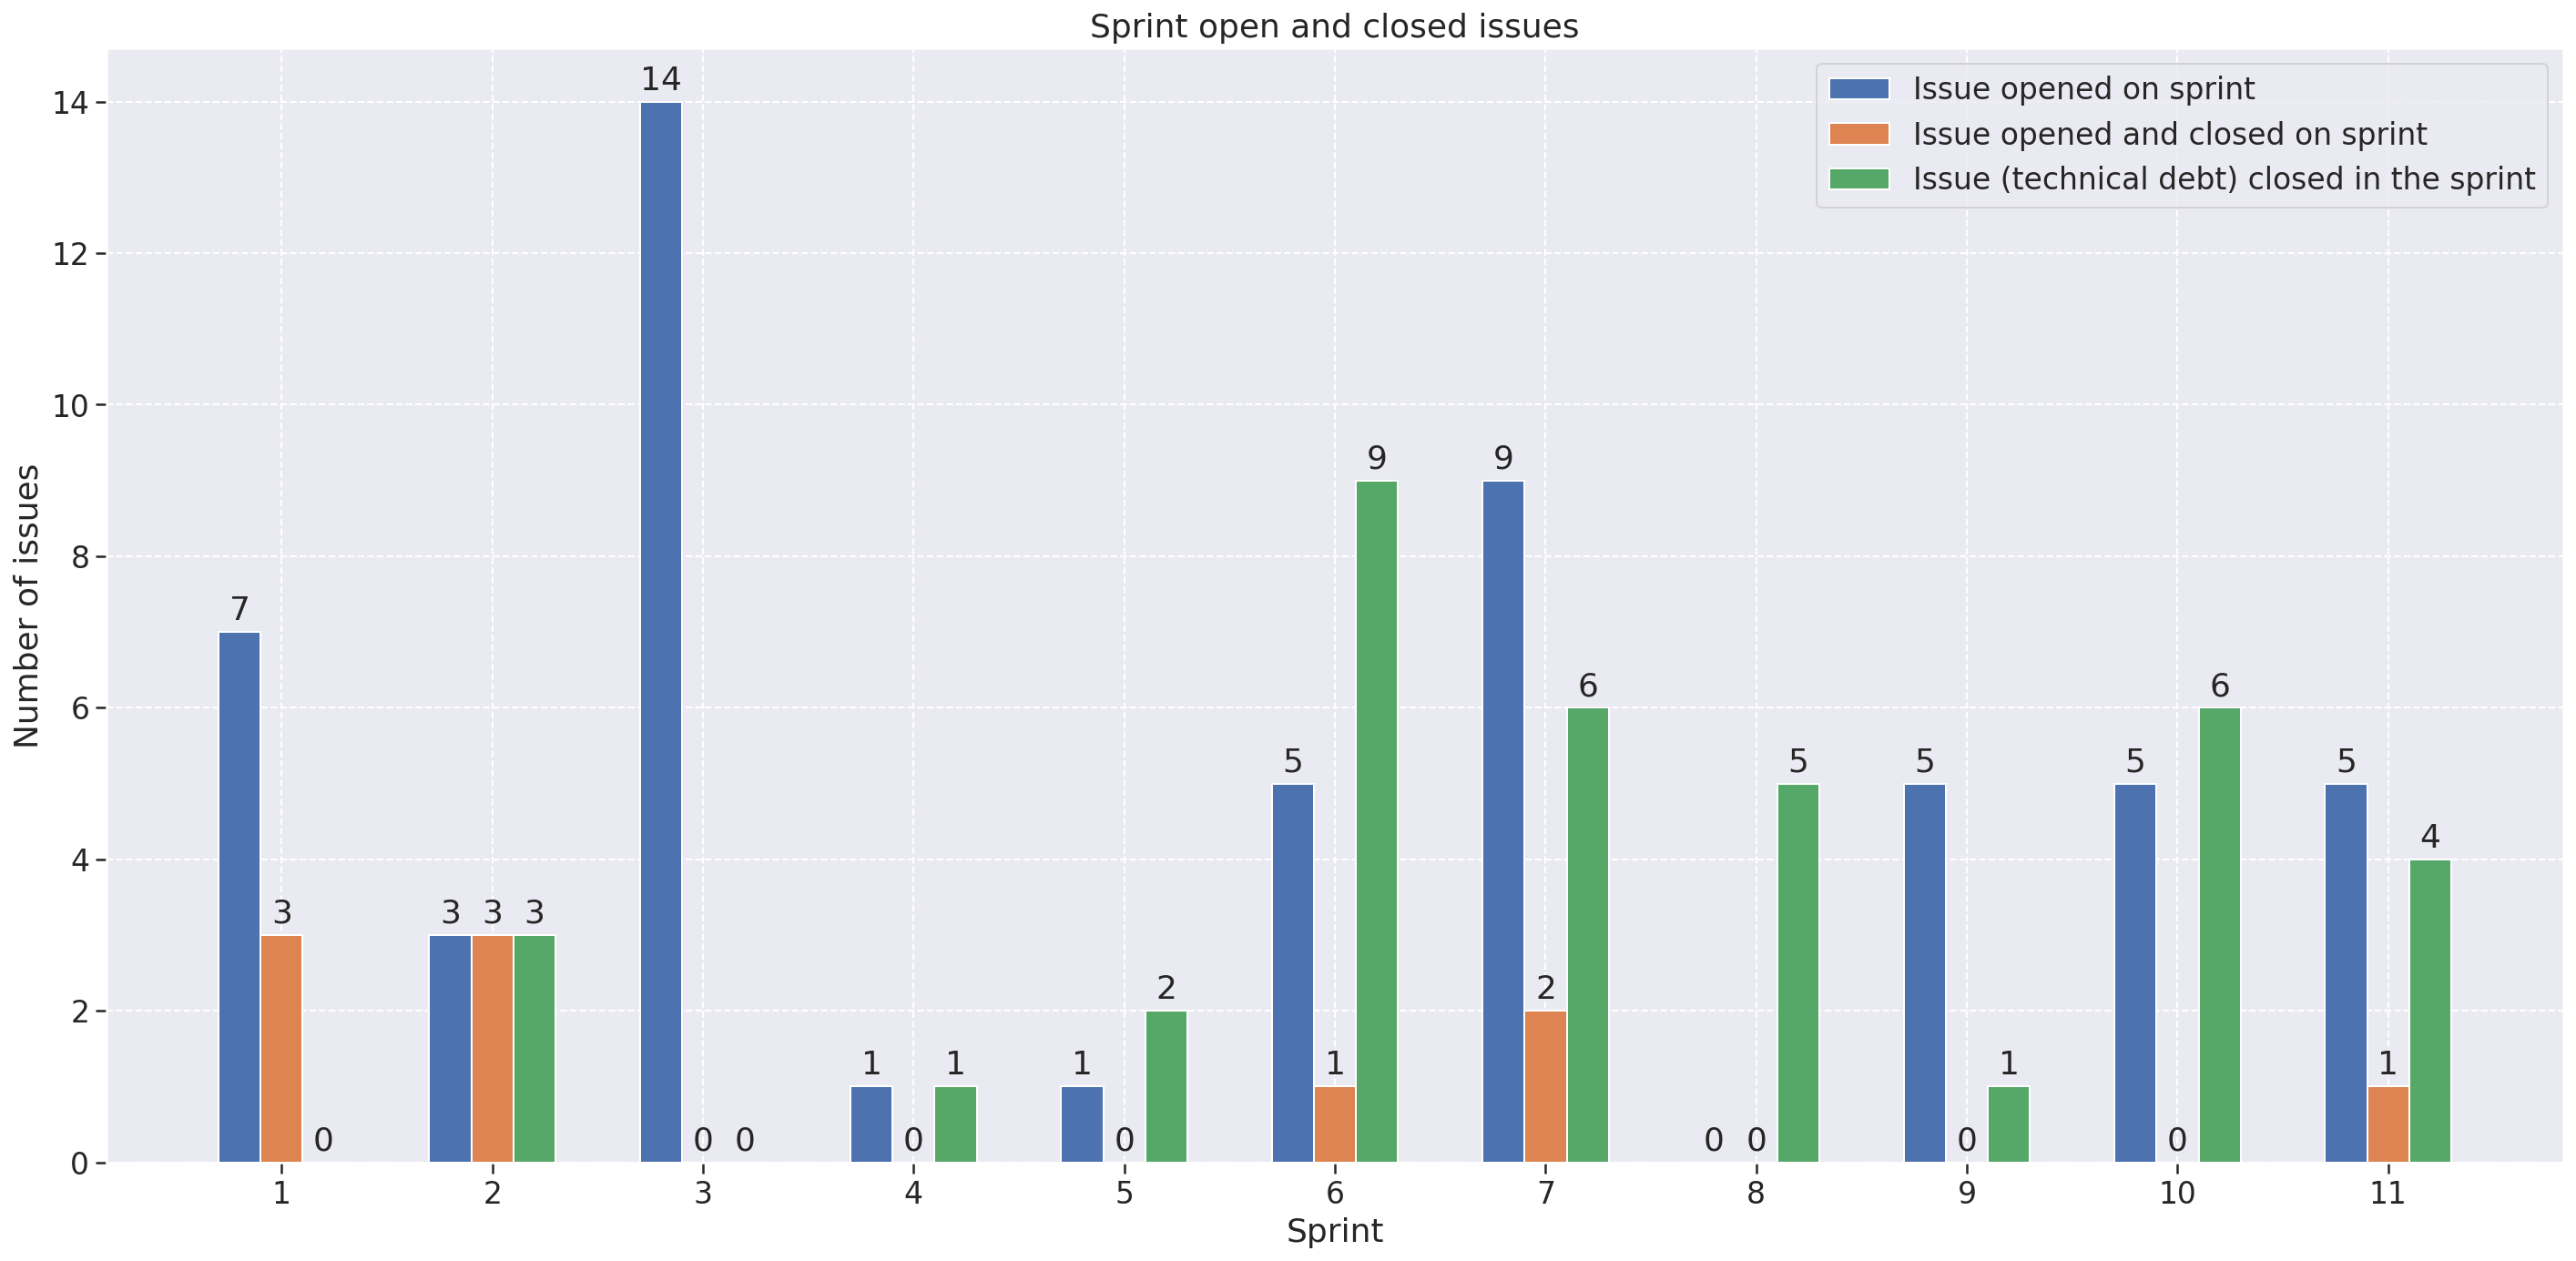

In [57]:
import operator
sprints = range(1, 12)

opened = []
opened_on_closed_on = []
closed = []
for sprint in sprints:
    if int(sprint) == 8:
        opened.append(0)
    else:
        opened.append(int(sprint_dataframes[f"{sprint}"]['NUMBER_OF_ISSUES']))

opened_on_closed_on = []
for sprint in sprints:
    if int(sprint) == 8:
        opened_on_closed_on.append(0)
    else:
        opened_on_closed_on.append(sprint_dataframes[f"{sprint}"]['NUMBER_OF_ISSUES_RESOLVED'])

for sprint in sprints:
    closed.append(len(df_frontend[(df_frontend["closed_on_sprint"] == f"{sprint}")]))
        
labels = sprints

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

closed = list(map(operator.sub, closed, opened_on_closed_on))

fig, ax = plt.subplots(figsize=(20, 10))
rects3 = ax.bar(x - width, opened, width, label='Issue opened on sprint')
rects2 = ax.bar(x, opened_on_closed_on, width, label='Issue opened and closed on sprint')
rects1 = ax.bar(x + width, closed, width, label='Issue (technical debt) closed in the sprint')

ax.set_ylabel('Number of issues')
ax.set_xlabel('Sprint')
ax.set_title(f"Sprint open and closed issues")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects3, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects1, padding=3)


fig.tight_layout()

plt.show()

#### Isse open time mean

In [58]:
df_frontend["time_open"].mean()

Timedelta('15 days 14:26:55.106382978')

#### m8 - ISSUE TYPE DENSITY

<BarContainer object of 12 artists>

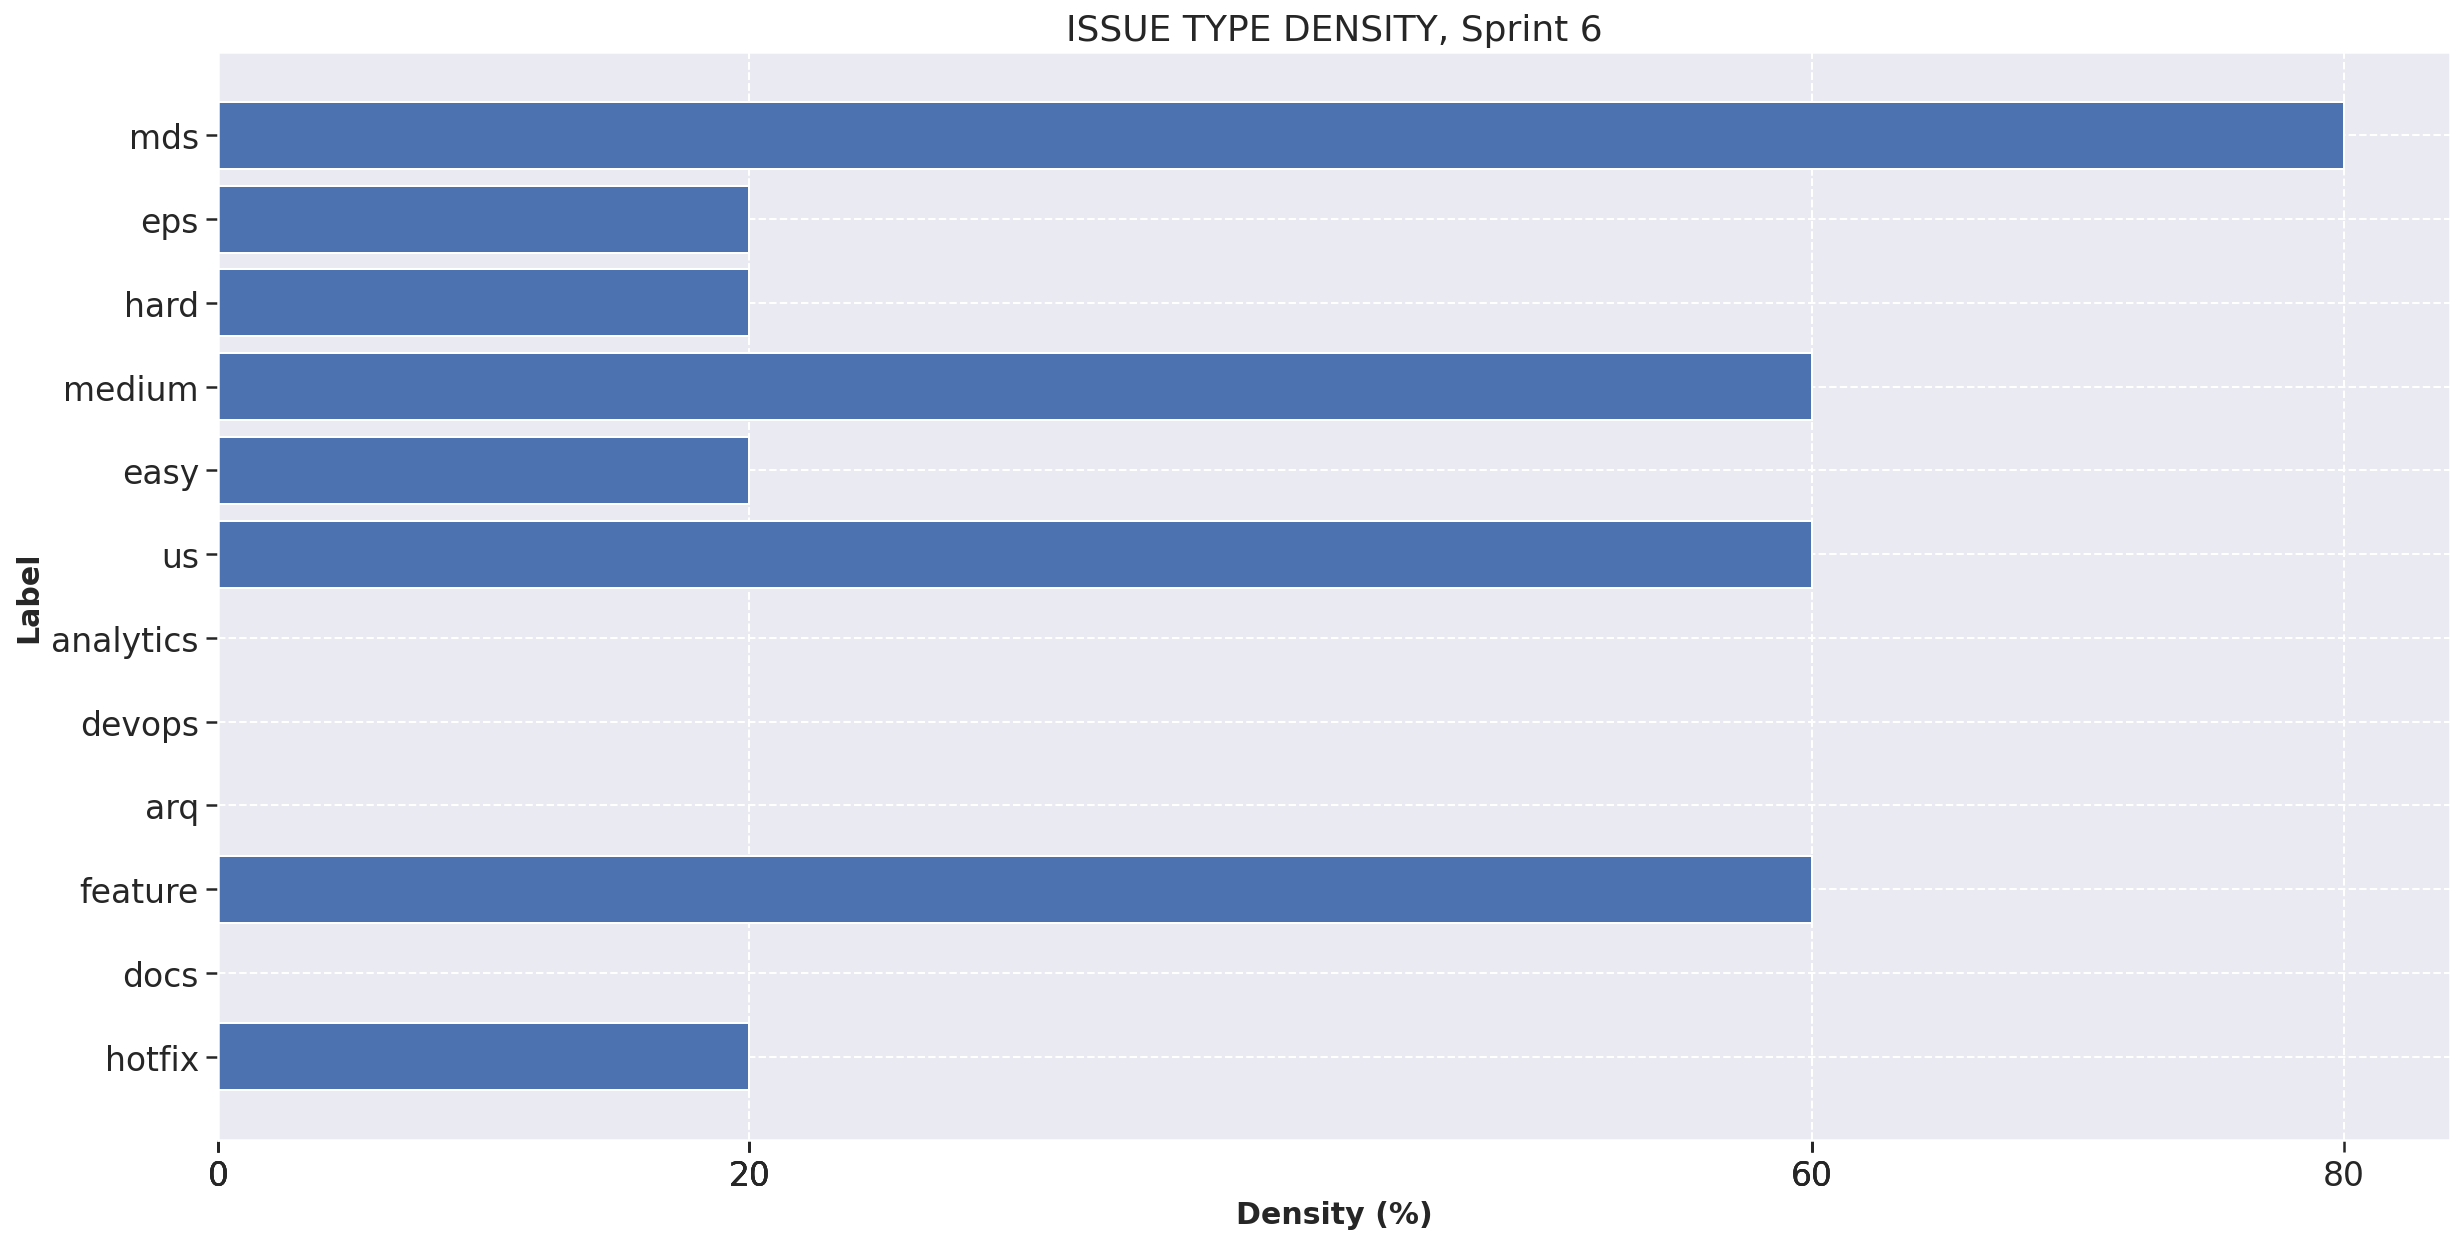

In [59]:
sprint_m8 = 6
fig = plt.figure(figsize=(20, 10))
plt.title(f"ISSUE TYPE DENSITY, Sprint {sprint_m8}")
plt.xticks(sprint_dataframes[f'{sprint_m8}']['m8']['percentage'])
plt.xlabel('Density (%)', fontweight ='bold', fontsize = 15)
plt.ylabel('Label', fontweight ='bold', fontsize = 15)
plt.barh(sprint_dataframes[f'{sprint_m8}']['m8']['density'],sprint_dataframes[f'{sprint_m8}']['m8']['percentage'])

#### m9 - BUGS RATIO

<BarContainer object of 10 artists>

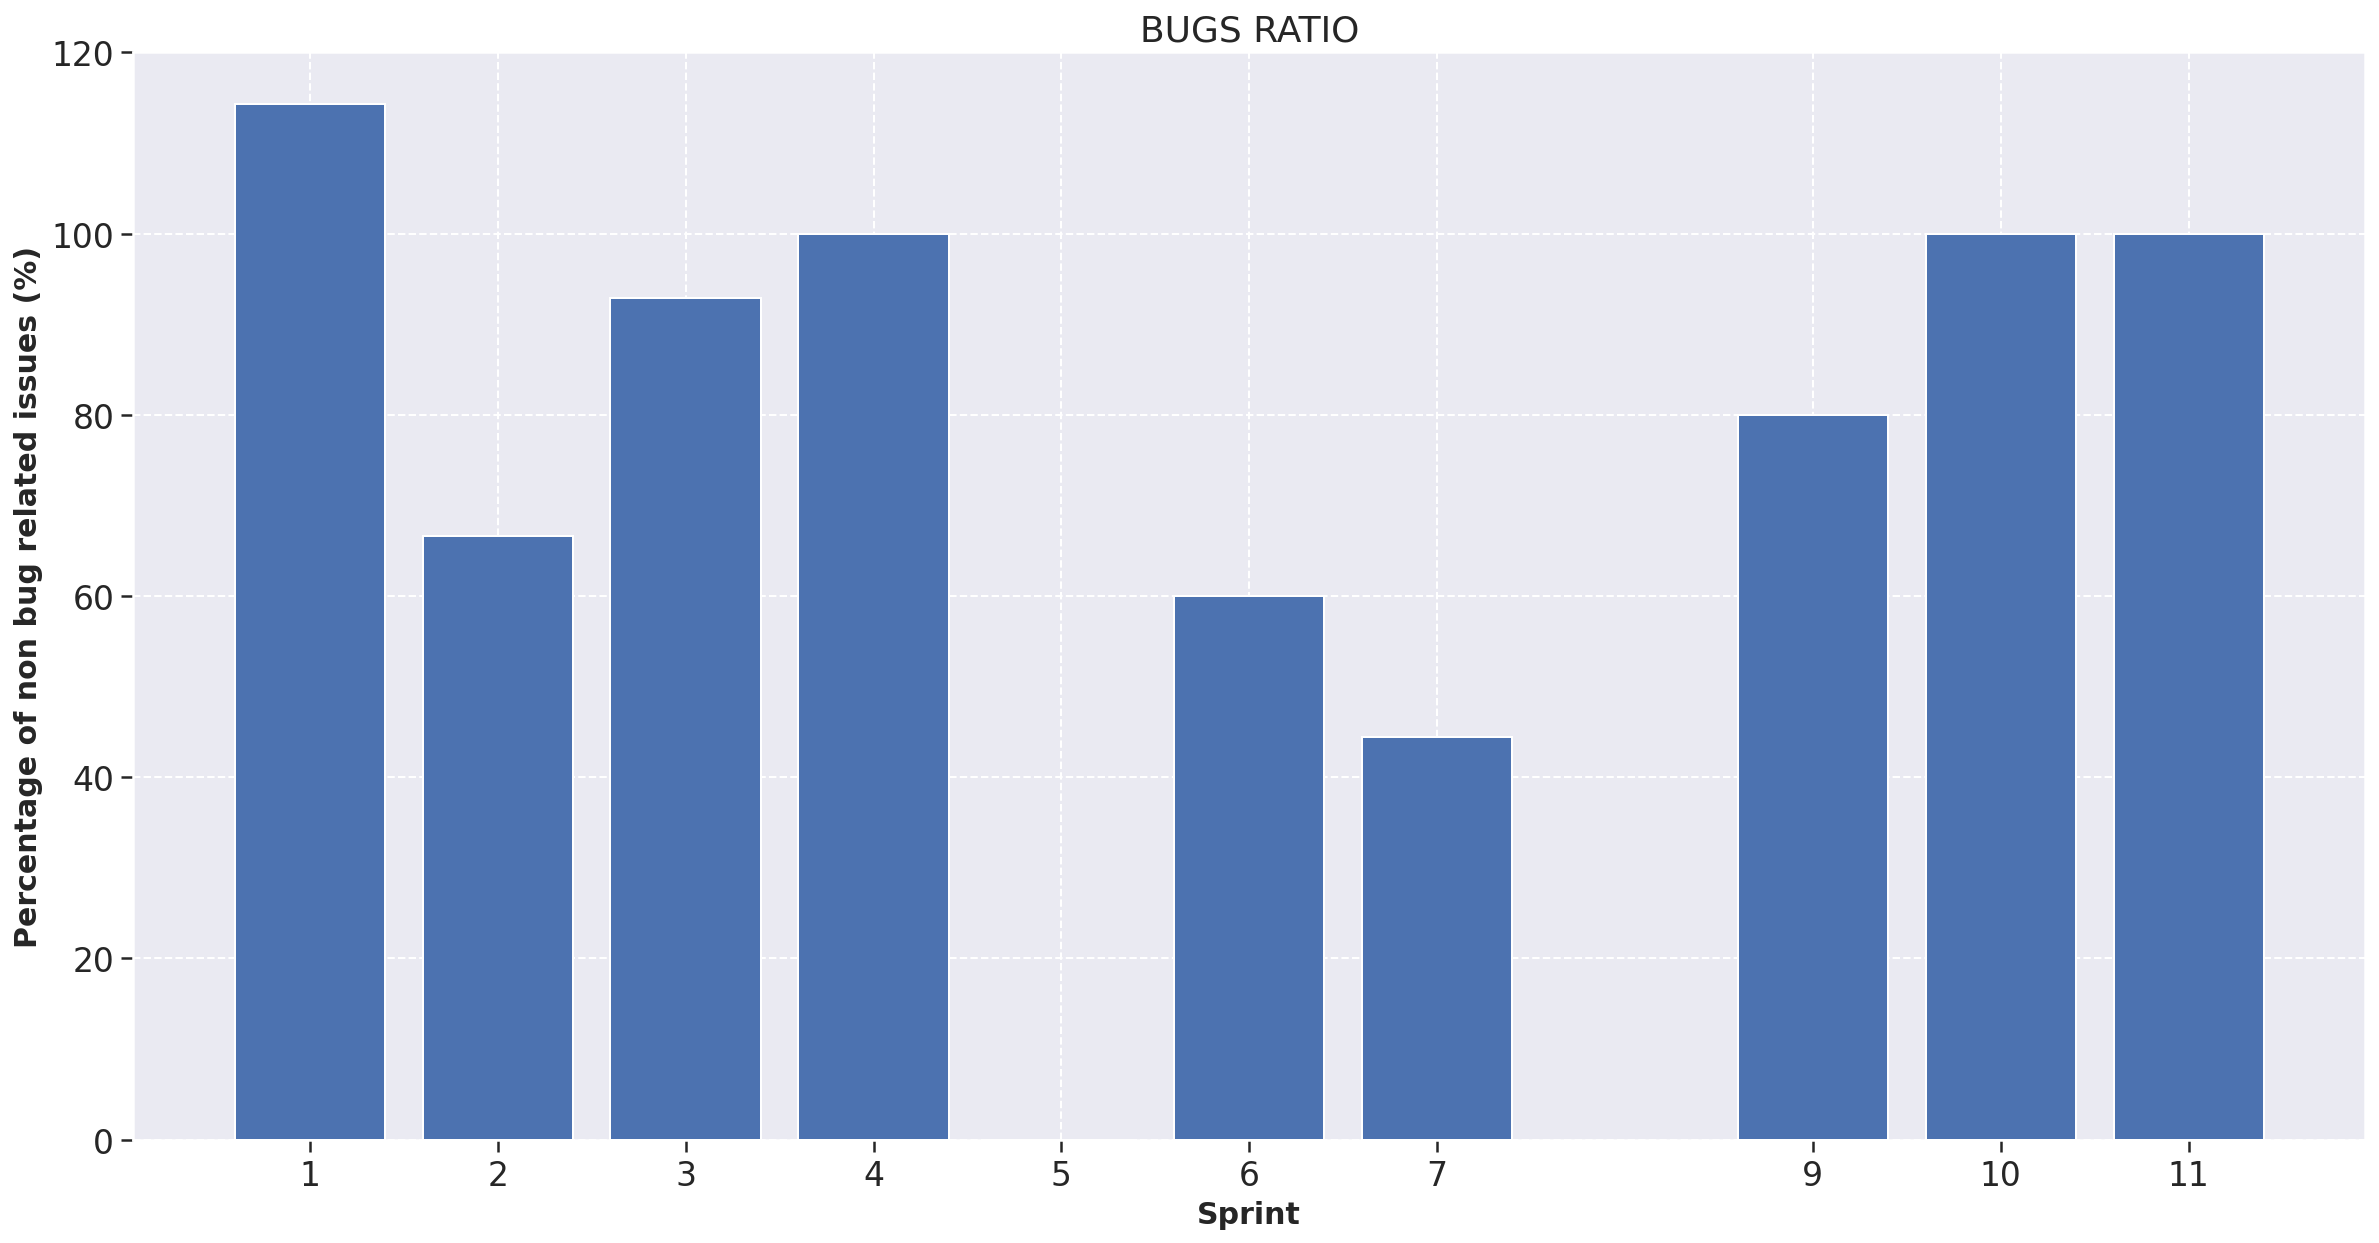

In [60]:
fig = plt.figure(figsize=(20, 10))
plt.title(f"BUGS RATIO")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 9, 10, 11])
plt.ylabel('Percentage of non bug related issues (%)', fontweight ='bold', fontsize = 15)
plt.xlabel('Sprint', fontweight ='bold', fontsize = 15)
plt.bar([1, 2, 3, 4, 5, 6, 7, 9, 10, 11],productivity_metrics_df['m9'])

###### Asc2 Calculation

In [61]:
psc2 = 1
pm7 = 0.5
pm9 = 0.5

productivity_metrics_df['asc2'] = ((productivity_metrics_df['m7']*pm7)+(productivity_metrics_df['m9']*pm9))*psc2
productivity_metrics_df['totalAC2'] = productivity_metrics_df['asc2'] * 1

In [62]:
productivity_metrics_df["data_inicio"] = productivity_metrics_df["data_inicio"].dt.strftime("%d-%m-%Y-%H-%M")
productivity_metrics_df["data_fim"] = productivity_metrics_df["data_fim"].dt.strftime("%d-%m-%Y-%H-%M")

In [63]:
productivity_metrics_df

,data_inicio,data_fim,m7,m9,no_sprint,asc2,totalAC2
0,06-03-2021-00-00,12-03-2021-23-59,42.86,114.29,1,78.575,78.575
1,13-03-2021-00-00,19-03-2021-23-59,100.00,66.67,2,83.335,83.335
2,20-03-2021-00-00,26-03-2021-23-59,0.00,92.86,3,46.430,46.430
3,27-03-2021-00-00,02-04-2021-23-59,0.00,100.00,4,50.000,50.000
4,03-04-2021-00-00,09-04-2021-23-59,0.00,0.00,5,0.000,0.000
5,10-04-2021-00-00,16-04-2021-23-59,20.00,60.00,6,40.000,40.000
6,17-04-2021-00-00,23-04-2021-23-59,22.22,44.44,7,33.330,33.330
7,01-05-2021-00-00,07-05-2021-23-59,0.00,80.00,9,40.000,40.000
8,08-05-2021-00-00,14-05-2021-23-59,0.00,100.00,10,50.000,50.000
9,15-05-2021-00-00,21-05-2021-23-59,20.00,100.00,11,60.000,60.000


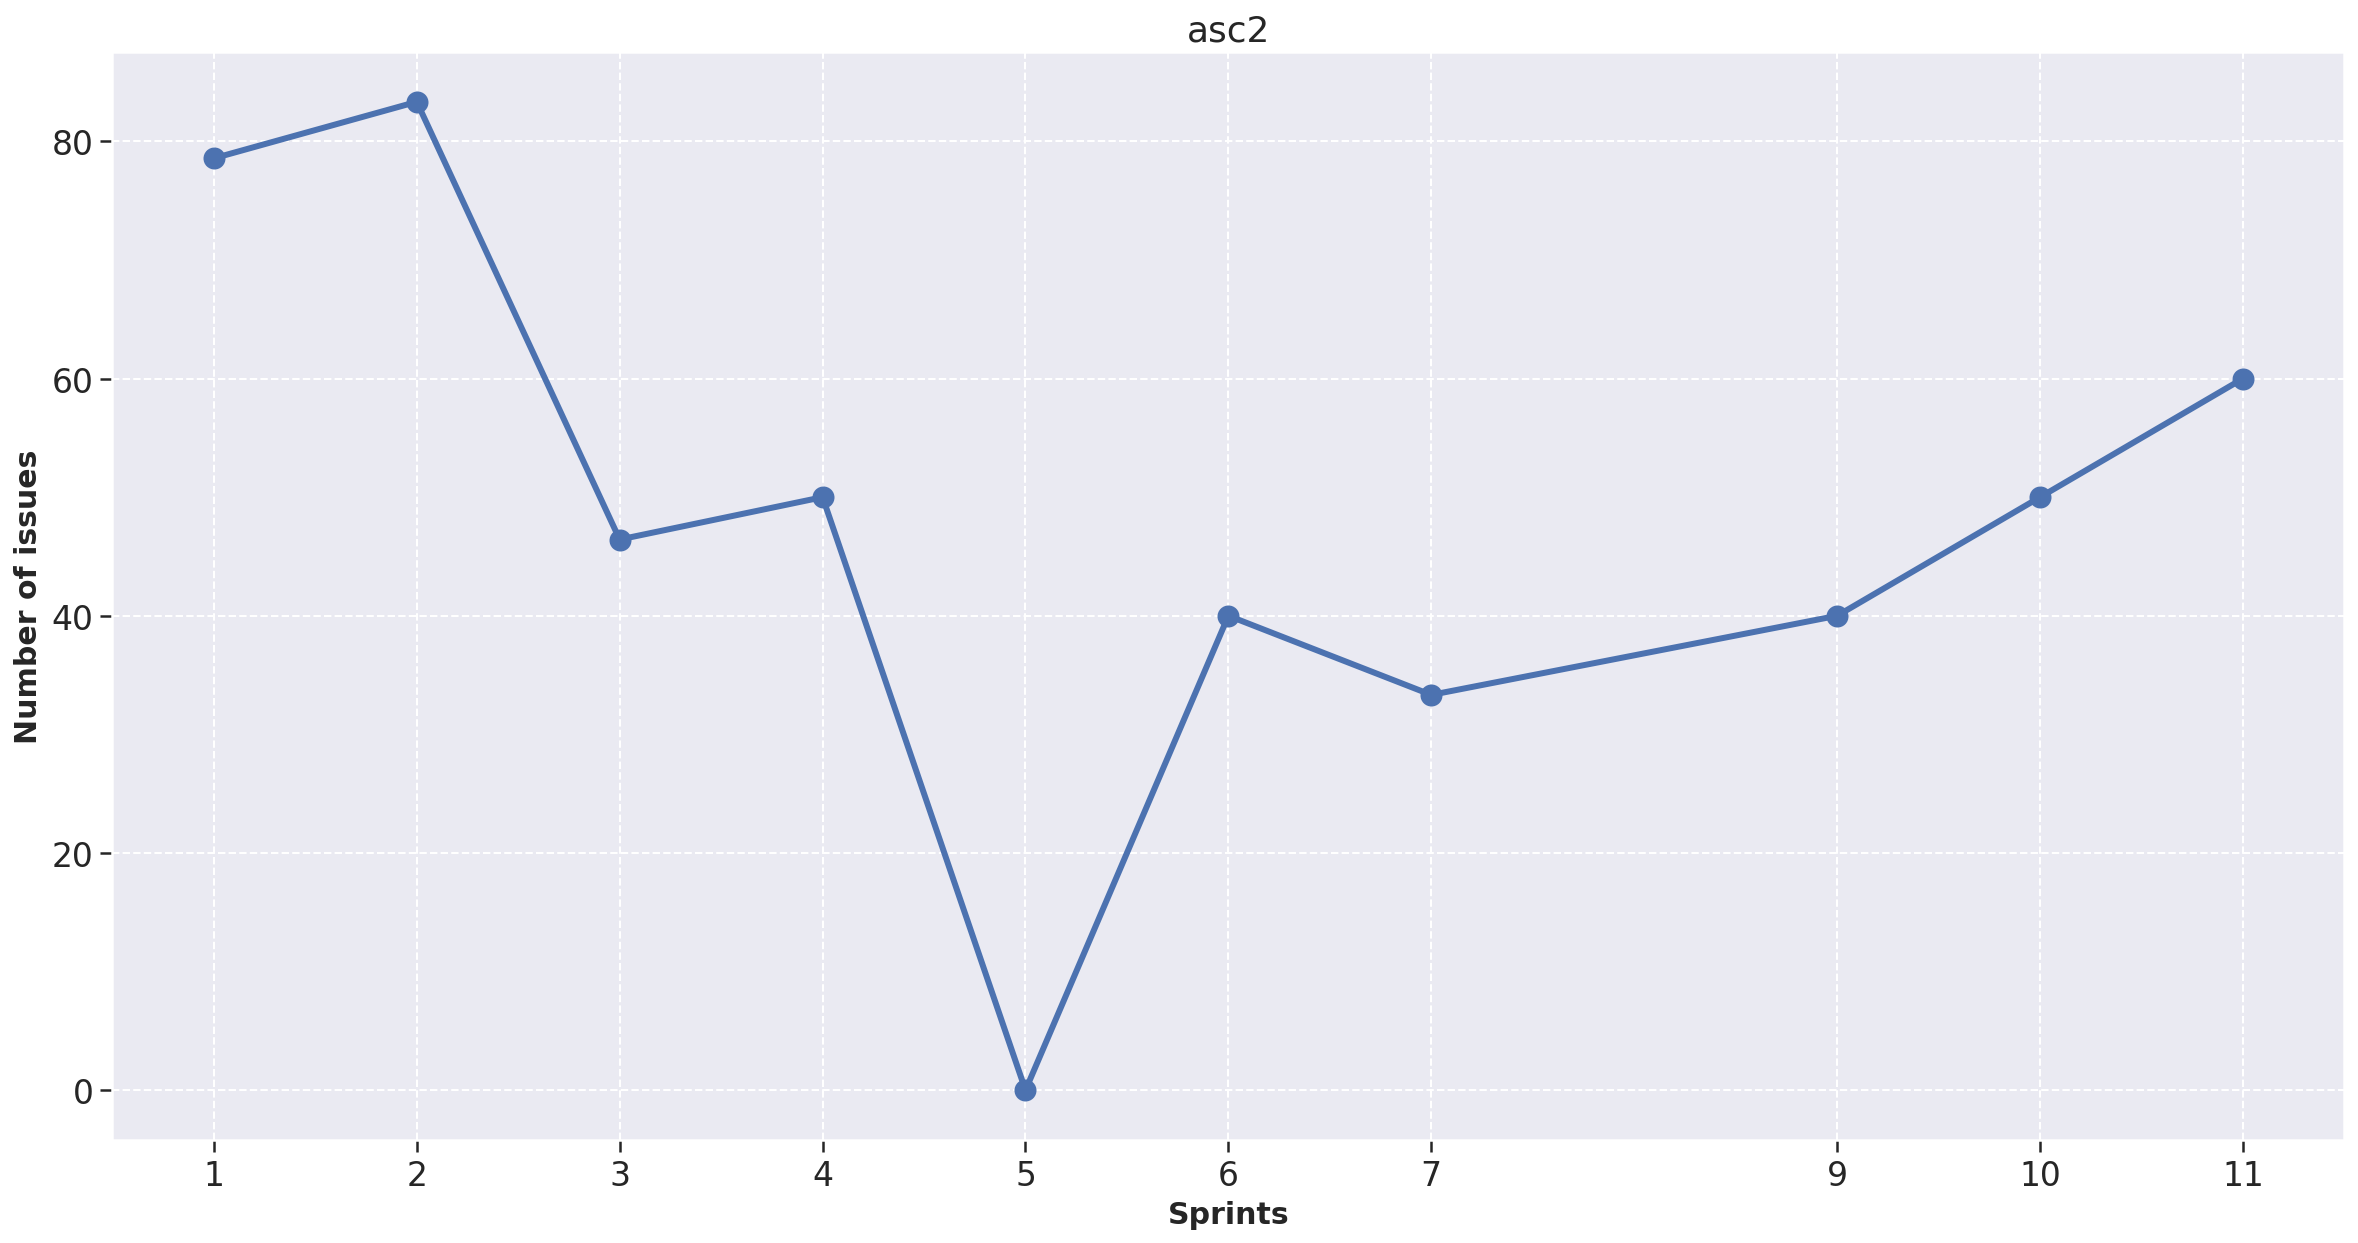

In [64]:
fig = plt.figure(figsize=(20, 10))
plt.title(f"asc2")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 9, 10, 11])
plt.xlabel('Sprints', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of issues', fontweight ='bold', fontsize = 15)
plt.plot([1, 2, 3, 4, 5, 6, 7, 9, 10, 11], productivity_metrics_df['asc2'], linewidth=3, marker='o', markersize=10)